# **_Author_:** _Yussuf Hersi_

# _First Look to the Data and Cleaning & Exploring_

_Tanzania is a developing country facing clean water challenges. With a population of over 59 million, there is a significant need to provide clean water to the population.
Many existing water wells are either nonfunctional or in need of repair._


_The objective is to develop a predictive model that can classify the status of water points as functional, nonfunctional, or functional but in need of repair._
_This model will assist the Tanzanian government in identifying maintenance requirements for existing wells and provide valuable insights for future well investments._

_By accurately predicting the status of water points, the model will enable authorities to optimize the utilization of water sources and make informed decisions regarding well maintenance._
_This project aims to contribute towards ensuring sustainable access to clean water in Tanzania while supporting efficient resource allocation by the government._

## Aim of This Notebook 

_The aim of this notebook is to perform data understanding, preparation, and exploration. We will download the necessary data and analyze the meanings of the columns. Our focus will be on identifying the required data cleaning steps. Through visualizations, we will examine certain features. Additionally, we will prepare the data for modeling by removing duplicate or unnecessary information, as well as handling null or irrelevant values._

_The key findings from the initial data exploration will be summarized in a concise list at the end of the notebook.At the end of the notebook we would also do initial modelling and modelling tunning._

## Data Source

_The original data for this project is available from the DrivenData competition [Pump it Up](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/).The data consists of four different datasets: submission format, training set, test set, and train labels set. The training set contains 59,400 water point records with 40 features, while the train labels set provides the corresponding status of these water points. The goal of the competition is to build a predictive model using the training set and train labels set and apply it to the test set to determine the status of the wells. For our project, we will specifically use the training set and train labels set._

## Importing Necessary Libraries 

In [89]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# Importing libraries for plotting
import matplotlib.pyplot as plt  # To plot
%matplotlib inline                # To display plots inline in Jupyter Notebook
import seaborn as sns              # To enhance visualizations




UsageError: unrecognized arguments: # To display plots inline in Jupyter Notebook


In [90]:
# To see the hidden columns in dataframe
pd.options.display.max_columns=100

In [91]:
df_train_set = pd.read_csv(r'C:\Users\Yussuf Hersi\Music\Projects\phase-3-project\data1\Training-set-values.csv') # train set data

In [92]:
# train label dataframe
df_train_labels = pd.read_csv(r"C:\Users\Yussuf Hersi\Music\Projects\phase-3-project\data1\Training-set-labels.csv") #train set labels data

# First Look to the Data and Merging Two Dataframes

In [93]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [94]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


The index numbers in two data sets look same but it is impossible to check the nearly 60000 points. So, to make sure we assign data sets 'id' as index and after that merge them. 

In [95]:

# setting id as an index to train set
df_train_set.set_index('id',inplace=True)

In [96]:
df_train_labels.set_index('id',inplace=True) # setting id as an index to train labels

In [97]:
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) #merging two data sets

In [98]:
df.reset_index(inplace=True) # setting a new index 

# Looking at Columns

In [99]:
df.info() #to see the types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [100]:
df.isna().sum() # to see the null values

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [101]:
df.describe() # to see numeric columns detailed

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [102]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [103]:
# Check the percentage status group
df['status_group'].value_counts(normalize=True)


functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

_We will address several issues in the dataset. Firstly, we have highly imbalanced target values. Secondly, there are null values in the data. Lastly, some columns contain duplicate or redundant information. To tackle these issues and simplify our data for easier model training, we will drop the duplicate and redundant columns, as they do not affect our target variable. Additionally, we will handle the null values appropriately._

### scheme_management / management / management_group columns

In [104]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [105]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

_We have identified that the columns 'scheme_management' and 'management' represent similar information, with 'scheme_management' indicating who operates the water point and 'management' indicating how the water point is managed. Since 'scheme_management' has 3877 null values, we will prefer to keep the 'management' column. Additionally, we observe that the column 'management_group' also provides similar information about how the water point is managed. Therefore, we can keep 'management' and 'management_group' while dropping 'scheme_management' to avoid redundancy in our data._

In [106]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [107]:
df.loc[df['management_group']=='user-group']['management'].value_counts() # to find sub-groups of this column

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

_To identify the subgroups within the 'management_group' column, we examined the unique values under the 'user-group' category. We found that the 'management_group' column is simply a grouped version of the more detailed 'management' column. Given that 'management' provides more specific information, we have decided to drop the 'management_group' column. However, to keep track of the subgroups within 'management_group', we grouped the data below to observe the number of subgroups within the 'management' column._

In [108]:
df.groupby(['management_group','management']).count() 
# to see how many sub-groups have in management group according to management column

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   num_private  basin  subvillage  region  \
management_group management                                                 
commercial       company                   685    685         685     685   
                 private operator         1971   1971        1932    1971   
                 trust                      78     78          78      78   
                 water authority           904    904         895     904   
other            other                     844    844         839     844   
                 other - school             99     99          99      99   
parastatal       parastatal               1768   1768        1768    1768   
unknown          unknown                   561    561         561     561   
user-group       vwc                     40507  40507       40189   40507   
                 water board              2933   2933        2933    2933   
                 

### quantity / quantity_group columns

In [109]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [110]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These two columns contain same information so we decided to drop 'quantity_group' column.

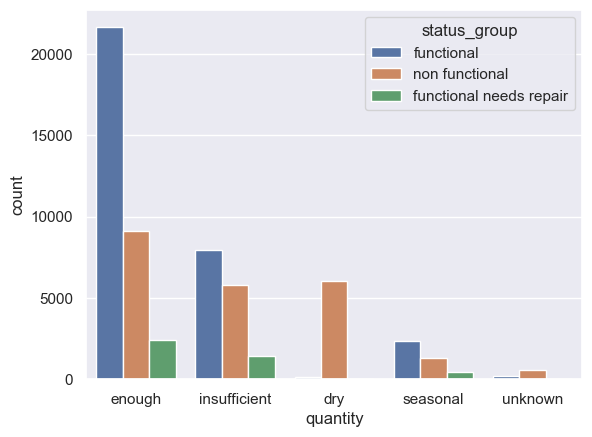

In [111]:
import seaborn as sns
ax = sns.countplot(x='quantity', hue="status_group", data=df)

*_The graph clearly shows that even when there is an adequate quantity of water available in certain wells, they are still non-functional. This suggests a strong correlation between non-functionality and dry quantity water points. When examining the graph, it becomes apparent that if a water point is categorized as dry or unknown, there is a high likelihood that it is non-functional. Conversely, if the quantity of water is sufficient, there is a higher probability of finding functional water points._*

#### source / source_type / source_class columns

In [112]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [113]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [114]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [115]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10252       11075   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11075   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   num_private  basin  subvillage  region  \
source_class source                                                         
groundwater  hand dtw                      874    874         874     874   
             machine dbh                 11075  11075       10849   11075   
             shallow well                16824  16824       16817   16824   
             spring                      17021  17021       16886   17021   
surface      dam                           656    656         656     656   
             lake                          765    765         764     765   
             rainwater harvesting         2295   2295        2293    2295   
             river                        9612   9612        9612    9612   
unknown      other                         212    212         212     212   
             unknown                        66     66          66      66   

                                   region_code  district_code    lga   ward  \
source_class source                                                           
groundwater  hand dtw                      874            874    874    874   
             machine dbh                 11075          11075  11075  11075   
             shallow well                16824          16824  16824  16824   
             spring                      17021          17021  

It is obvious that these three columns keep same information. so, we decided to keep just 'source' column, because it has more detailed information and we will drop others.

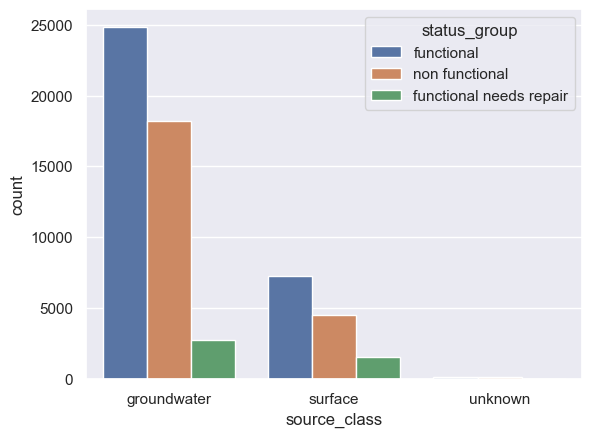

In [116]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

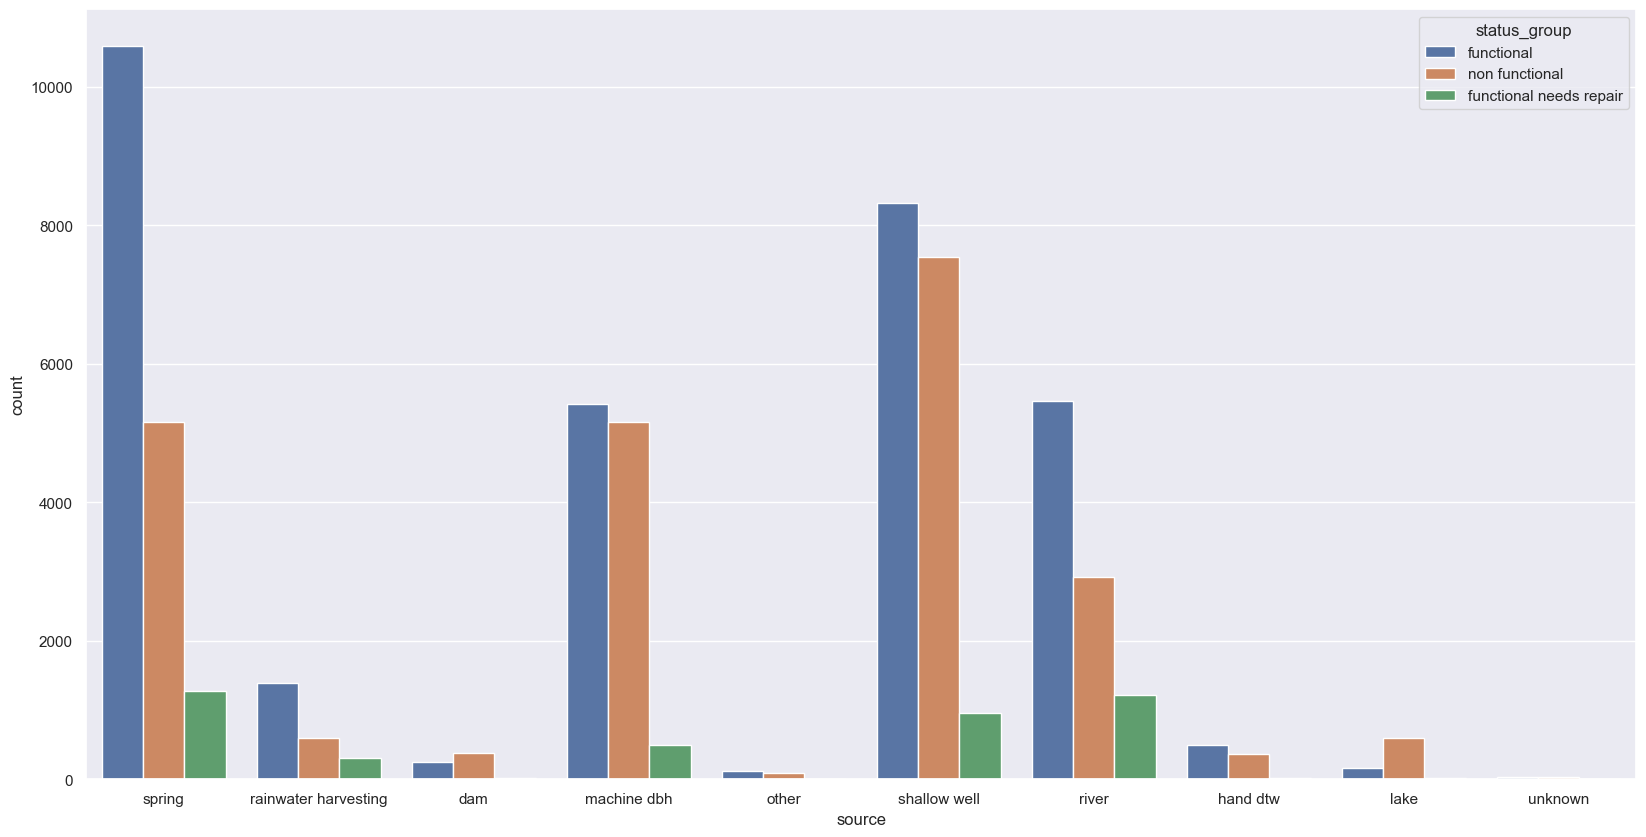

In [117]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

### water_quality / quality_group columns

In [118]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [119]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

_'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'._

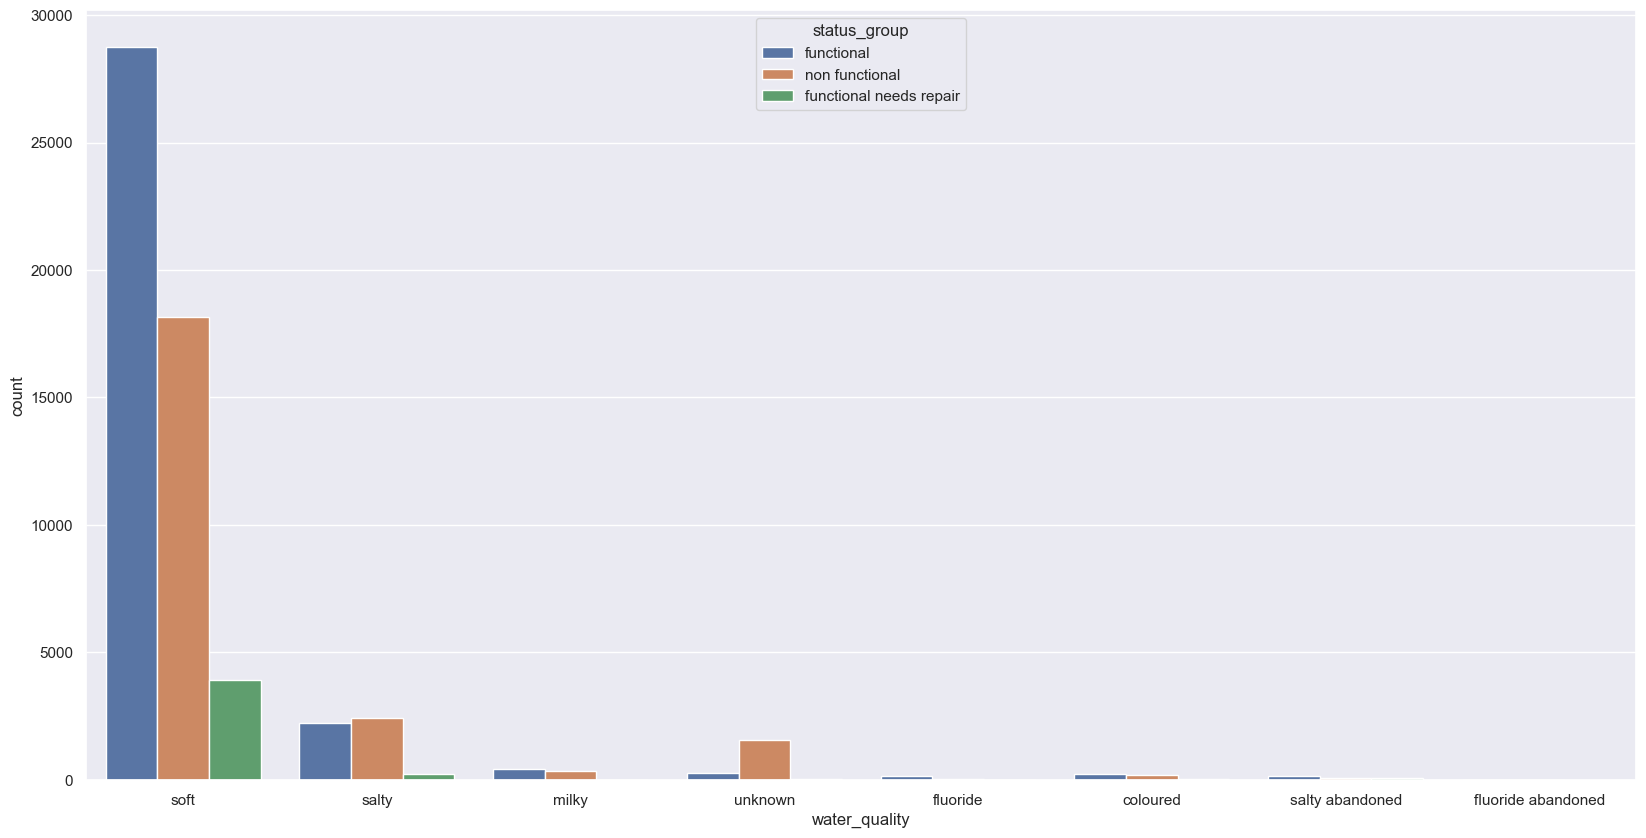

In [120]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

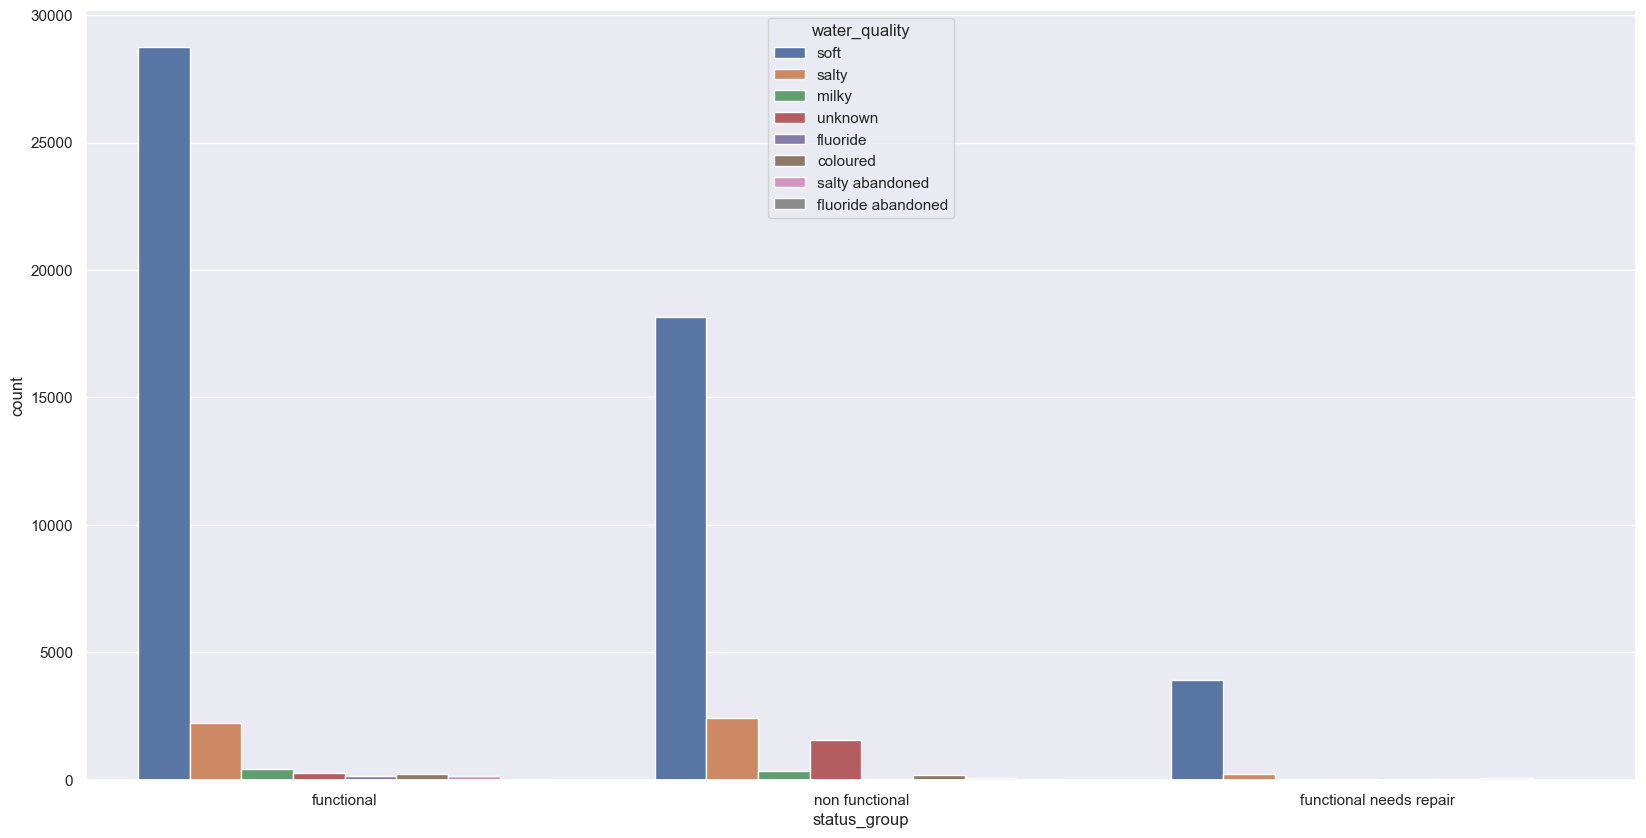

In [121]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

_From the graphs, it is seen that lots of non-functional water points have soft, good water quality._

### payment / payment_type columns

In [122]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [123]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

_These two columns are same so we decided to drop one of them._

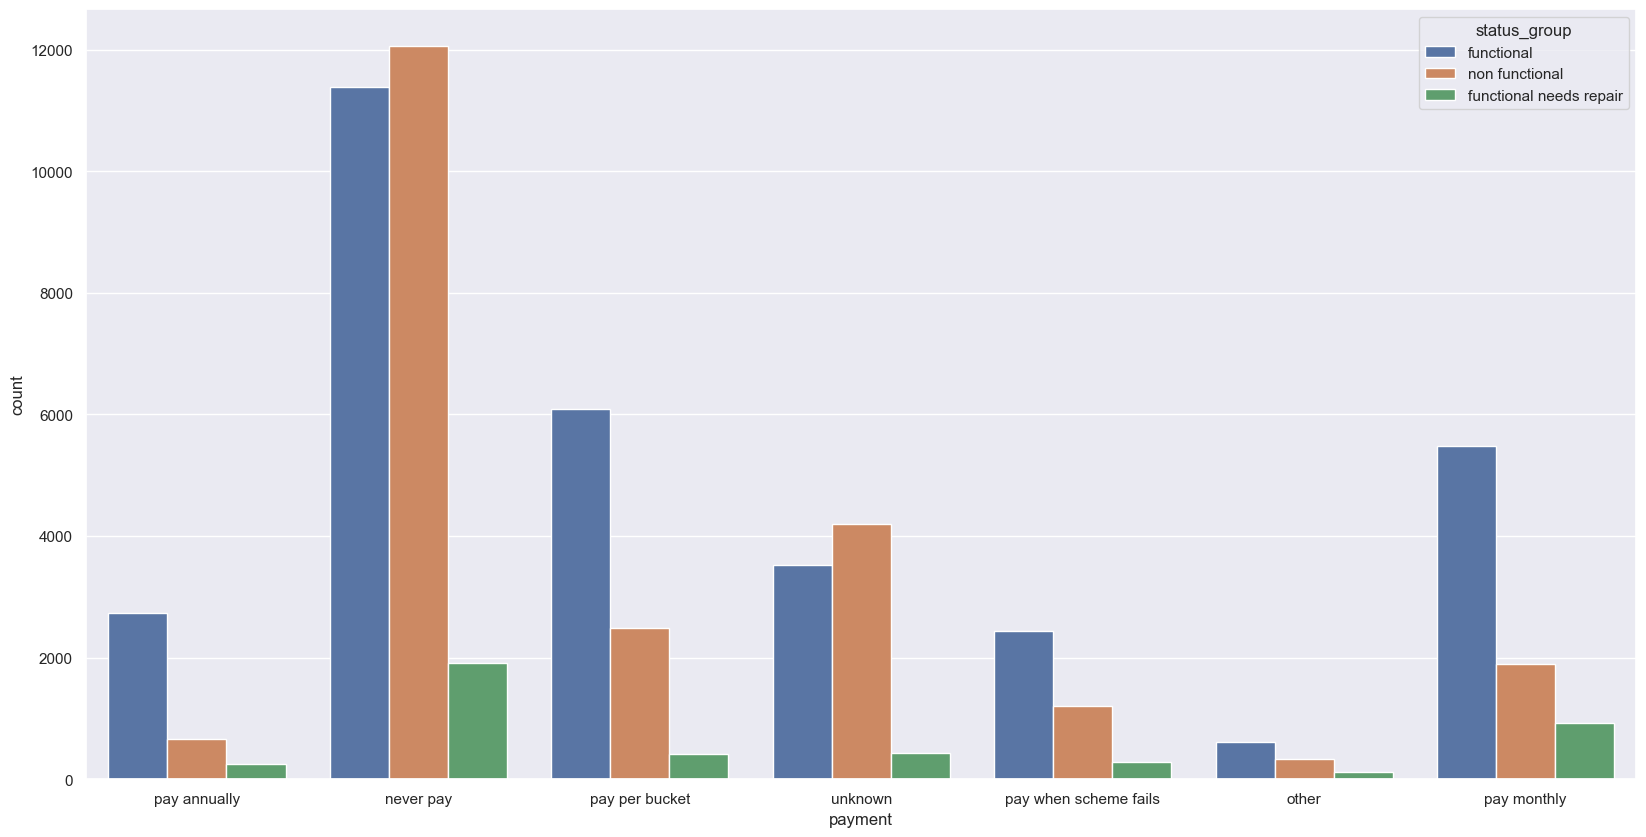

In [124]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

This feature shows us what the water cost. Mostly, there are lots of non-functioal water points as never paid for them. 

### extraction_type / extraction_type_group / extraction_type_class columns

In [125]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [126]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [127]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [128]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26780        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                    

_It is obviously seen that these three columns keep same information. So, we decided to keep 'extraction_type_group' and drop others. Although, extraction_type has more unique values than extraction_type_group , some of these values are very small amount according to this big dataset. We prefered to use more compact one. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep._

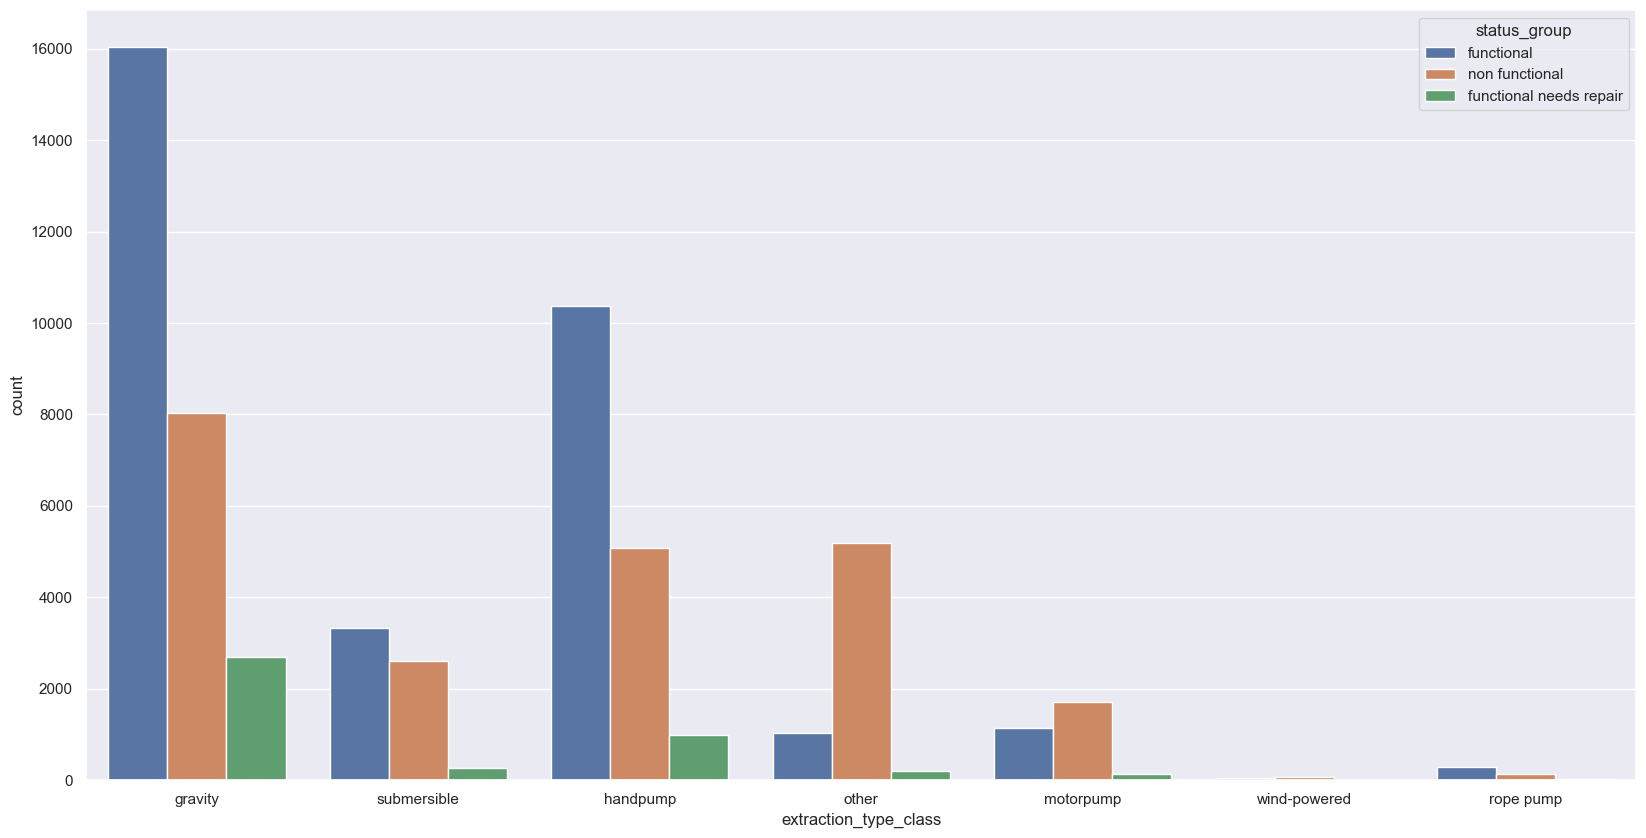

In [129]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

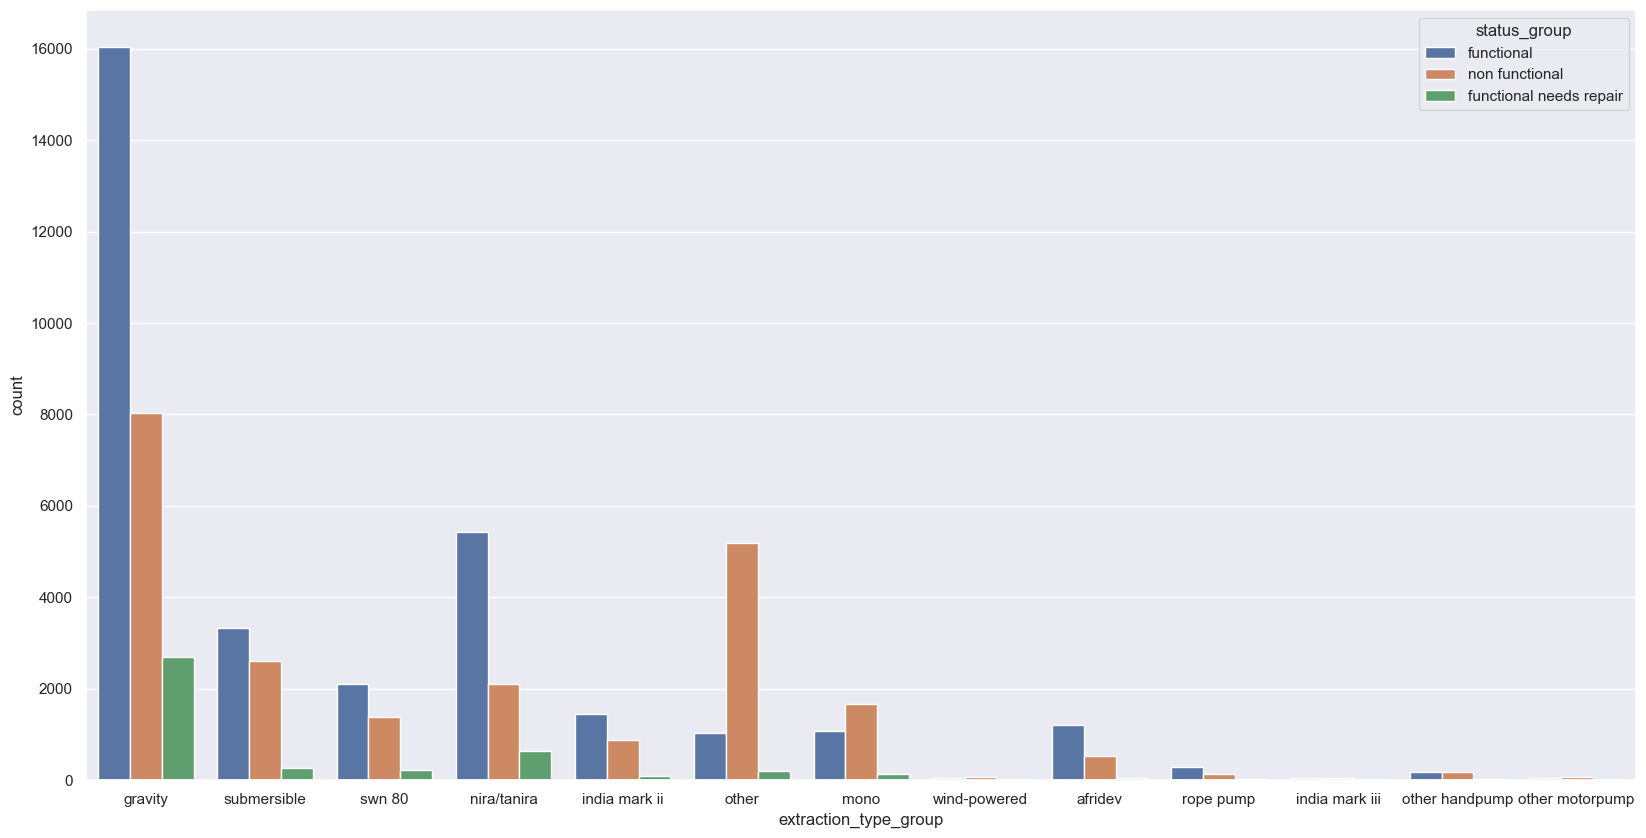

In [130]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

_Especially, other and mono extraction types have higher change to be non-functional than functional._

## waterpoint_type / waterpoint_type_group

In [131]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [132]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We decided to keep 'waterpoint_type' which contains more detail.

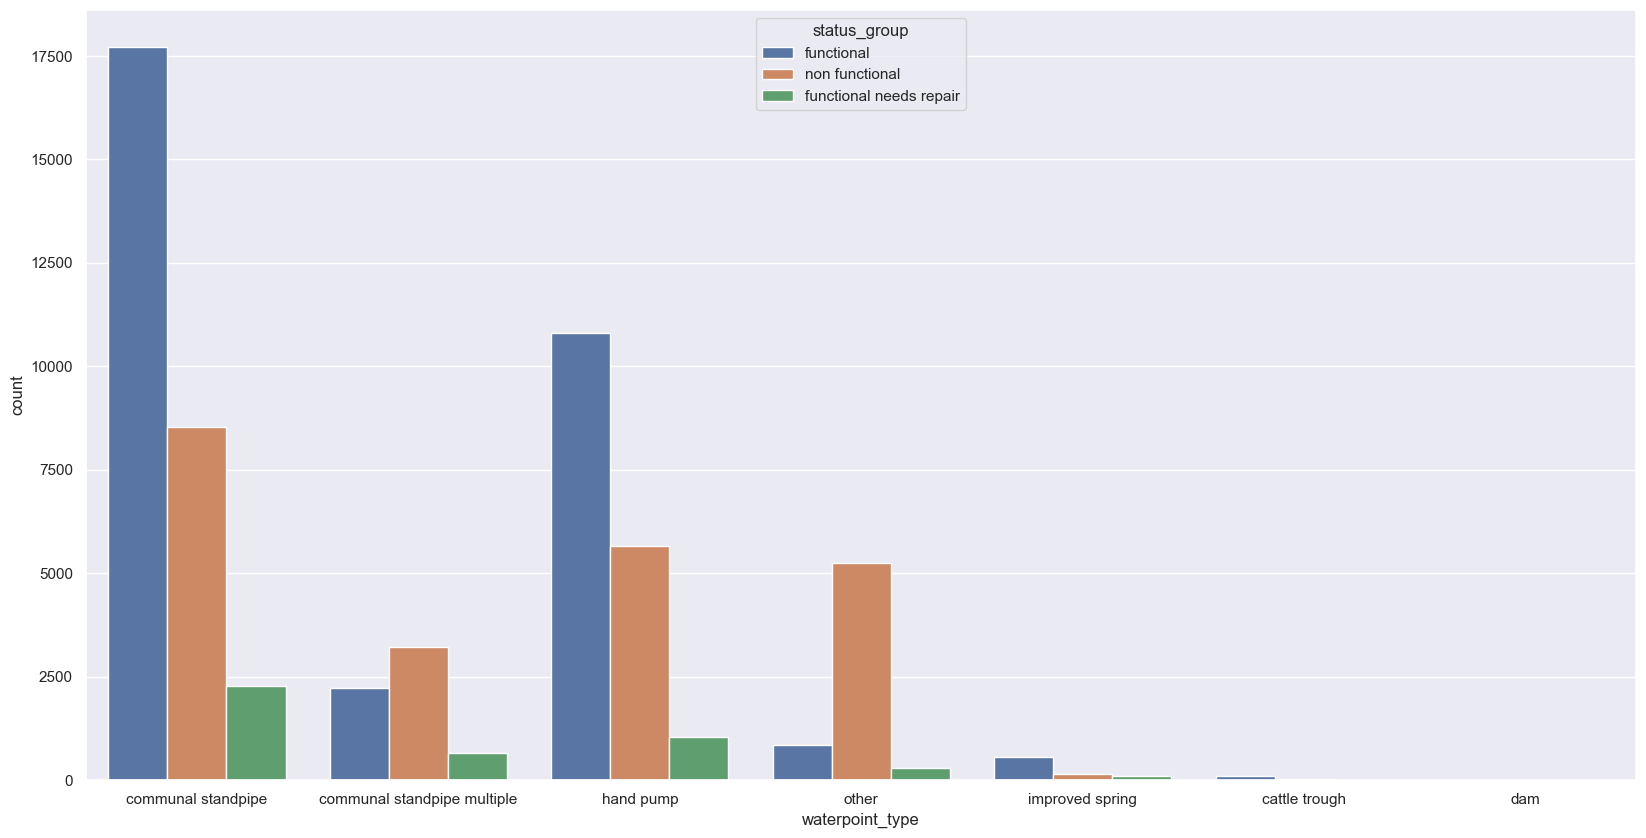

In [133]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

_The data reveals a correlation between the waterpoint type and the functionality of water points. Specifically, communal standpipes have a higher likelihood of being functional, while communal standpipe multiple and other types have a higher probability of being non-functional._

# Dropping Similar Columns

In [134]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

# Continue to Exploring Columns

_We continue to check data for finding unnecessary or wrong values._

### construction_year column

In [135]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

_New feature is added to the dataset. The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades._

In [136]:
df['decade'] = df['construction_year'] #creating new columns

In [137]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [138]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [139]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [140]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

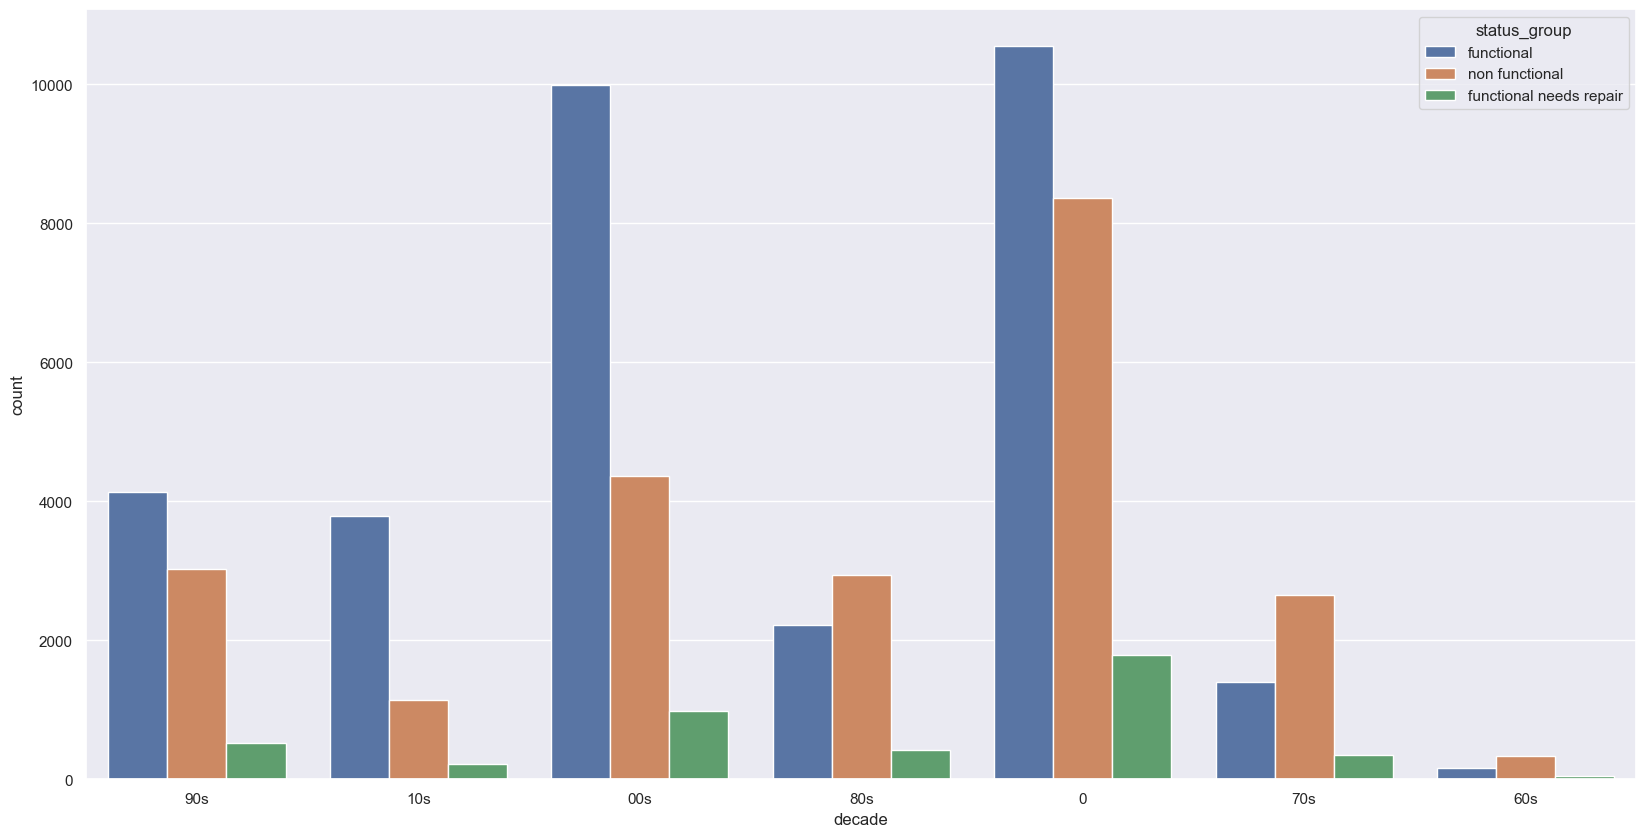

In [141]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

_It is obviously seen that missing values and most recent years have more functional water points._

### recorded_by column

In [142]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

The recorded_by column has one value. This will not give any information to our model. So, we dropped it also.

In [143]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

### installer column

_There are lots of NaN and 0 values in this column. Firstly, we will convert them to unknown._

In [144]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [145]:
df['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [146]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [147]:
# Replacing spelling mistakes and consolidating categories with similar names in the 'installer' column

df['installer'].replace(to_replace=('District Water Department', 'District water depar', 'Distric Water Department'),
                        value='District water department', inplace=True)

df['installer'].replace(to_replace=('FinW', 'Fini water', 'FINI WATER'), value='Fini Water', inplace=True)
df['installer'].replace(to_replace='JAICA', value='Jaica', inplace=True)

df['installer'].replace(to_replace=('COUN', 'District COUNCIL', 'DISTRICT COUNCIL', 'District Counci',
                                     'District Council', 'Council', 'Counc', 'District  Council', 'Distri'),
                        value='District council', inplace=True)

df['installer'].replace(to_replace=('RC CHURCH', 'RC Churc', 'RC', 'RC CH', 'RC C', 'RC CH', 'RC church',
                                     'RC CATHORIC'), value='RC Church', inplace=True)

df['installer'].replace(to_replace=('Central Government', 'Tanzania Government', 'central government',
                                     'Cental Government', 'Cebtral Government', 'Tanzanian Government',
                                     'Tanzania government', 'Centra Government', 'CENTRAL GOVERNMENT',
                                     'TANZANIAN GOVERNMENT', 'Central govt', 'Centr', 'Centra govt'),
                        value='Central government', inplace=True)

df['installer'].replace(to_replace=('World vision', 'World Division', 'World Vision'),
                        value='world vision', inplace=True)

df['installer'].replace(to_replace=('Unisef', 'UNICEF'), value='Unicef', inplace=True)
df['installer'].replace(to_replace='DANID', value='DANIDA', inplace=True)

df['installer'].replace(to_replace=('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi',
                                     'Village Council', 'Village Counil', 'Villages', 'Vill', 'Village community',
                                     'Villaers', 'Village Community', 'Villag', 'Villege Council', 'Village council',
                                     'Village  Council', 'Villagerd', 'Villager', 'Village Technician',
                                     'Village Office', 'Village community members'),
                        value='villagers', inplace=True)

df['installer'].replace(to_replace=('Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY'),
                        value='Community', inplace=True)

df['installer'].replace(to_replace=('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove',
                                     'Governme', 'Governmen'), value='Government', inplace=True)

df['installer'].replace(to_replace='Hesawa', value='HESAWA', inplace=True)


In [148]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [149]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

_We checked the first 100 values in the "installer" column. We found that some installer names were misspelled or written differently, such as "District Council" and "District council." We will correct these errors. The first 100 values contain 47,237 values, which is 79.5% of the data. This means that we have checked 79.5% of the data._



_Now we want to see most common 20 values and visualize them to see the functionality. For this plot, we will not take the values which are smaller than 400. Because this amount does not have majority in this data and it is not good to see thousands of values in same graph._

In [150]:
df['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               409
LGA                     408
villagers               408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [151]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

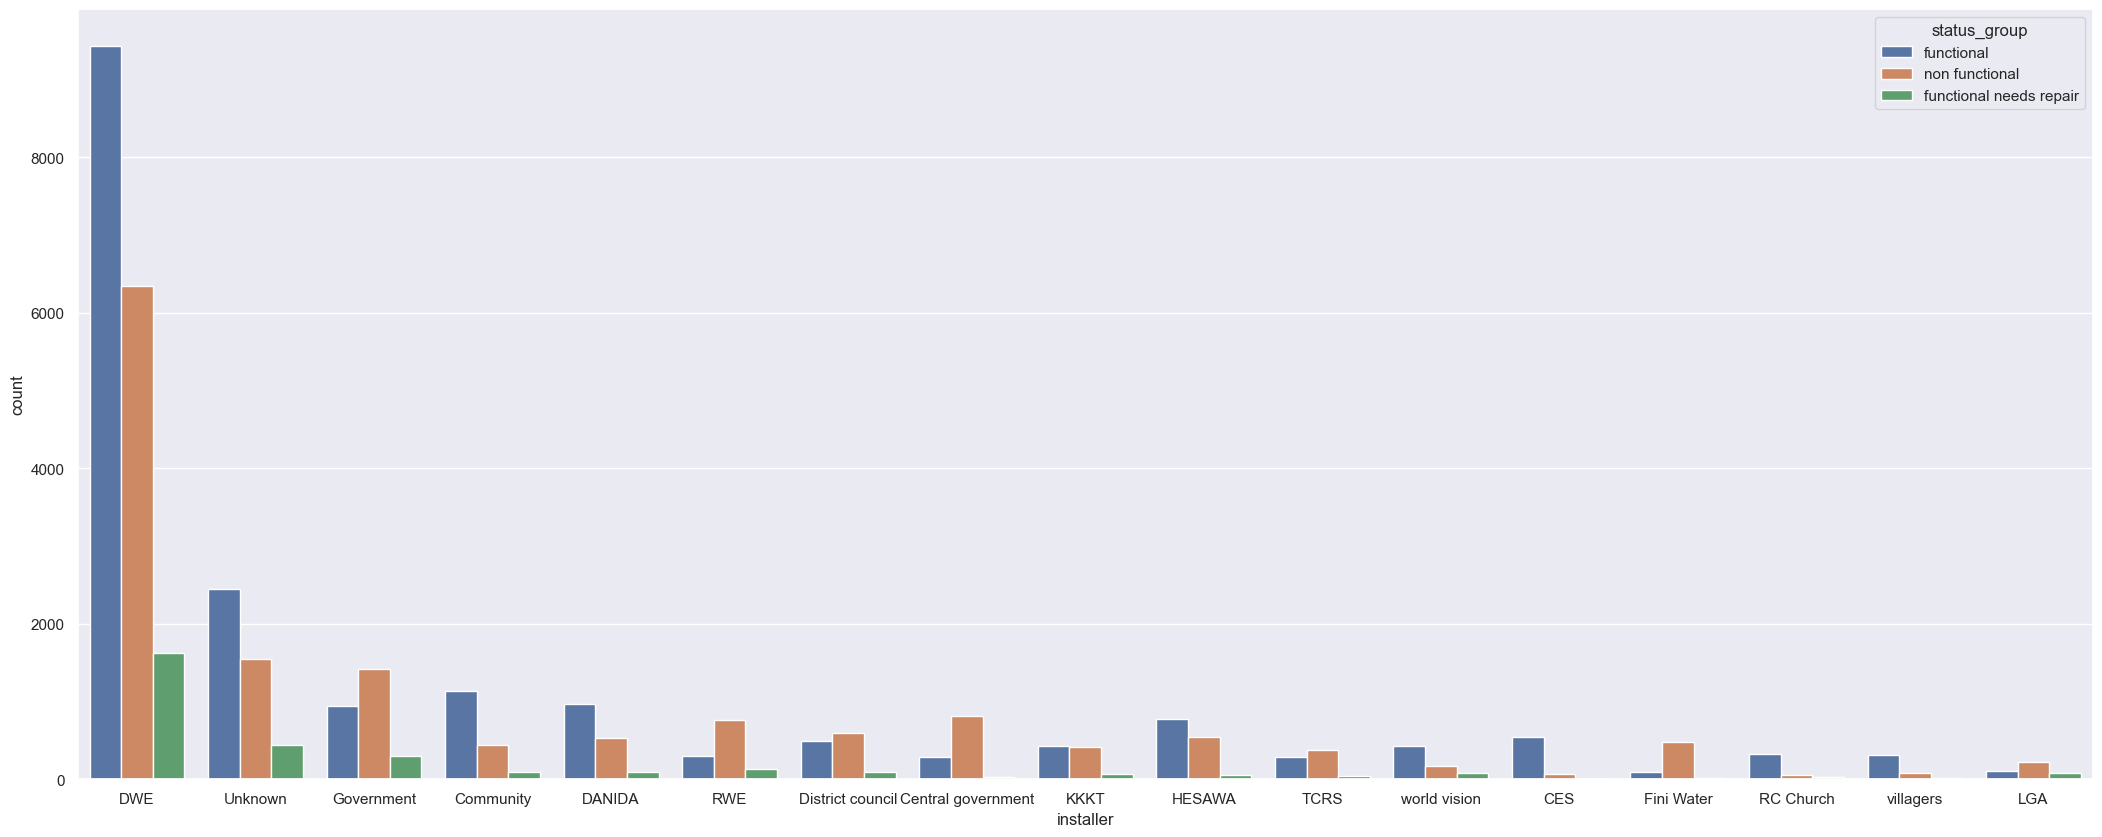

In [152]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

It is interesting that most of water points which central government and district council installed are non-functional. DWE has the majority of functional wells but has also many non-functional wells.

To ease our encoding later on, we will collect installers which has less than 400 value counts together and named them others.

In [153]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [154]:
# define df_test

df_test = pd.read_csv(r'C:\Users\Yussuf Hersi\Music\Projects\phase-3-project\data1\Test-set-values.csv')


In [155]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

Now, we have new feature as installer_cat with 17 unique values.

### funder column

In [156]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [157]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 20 values for future encoding.

In [158]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

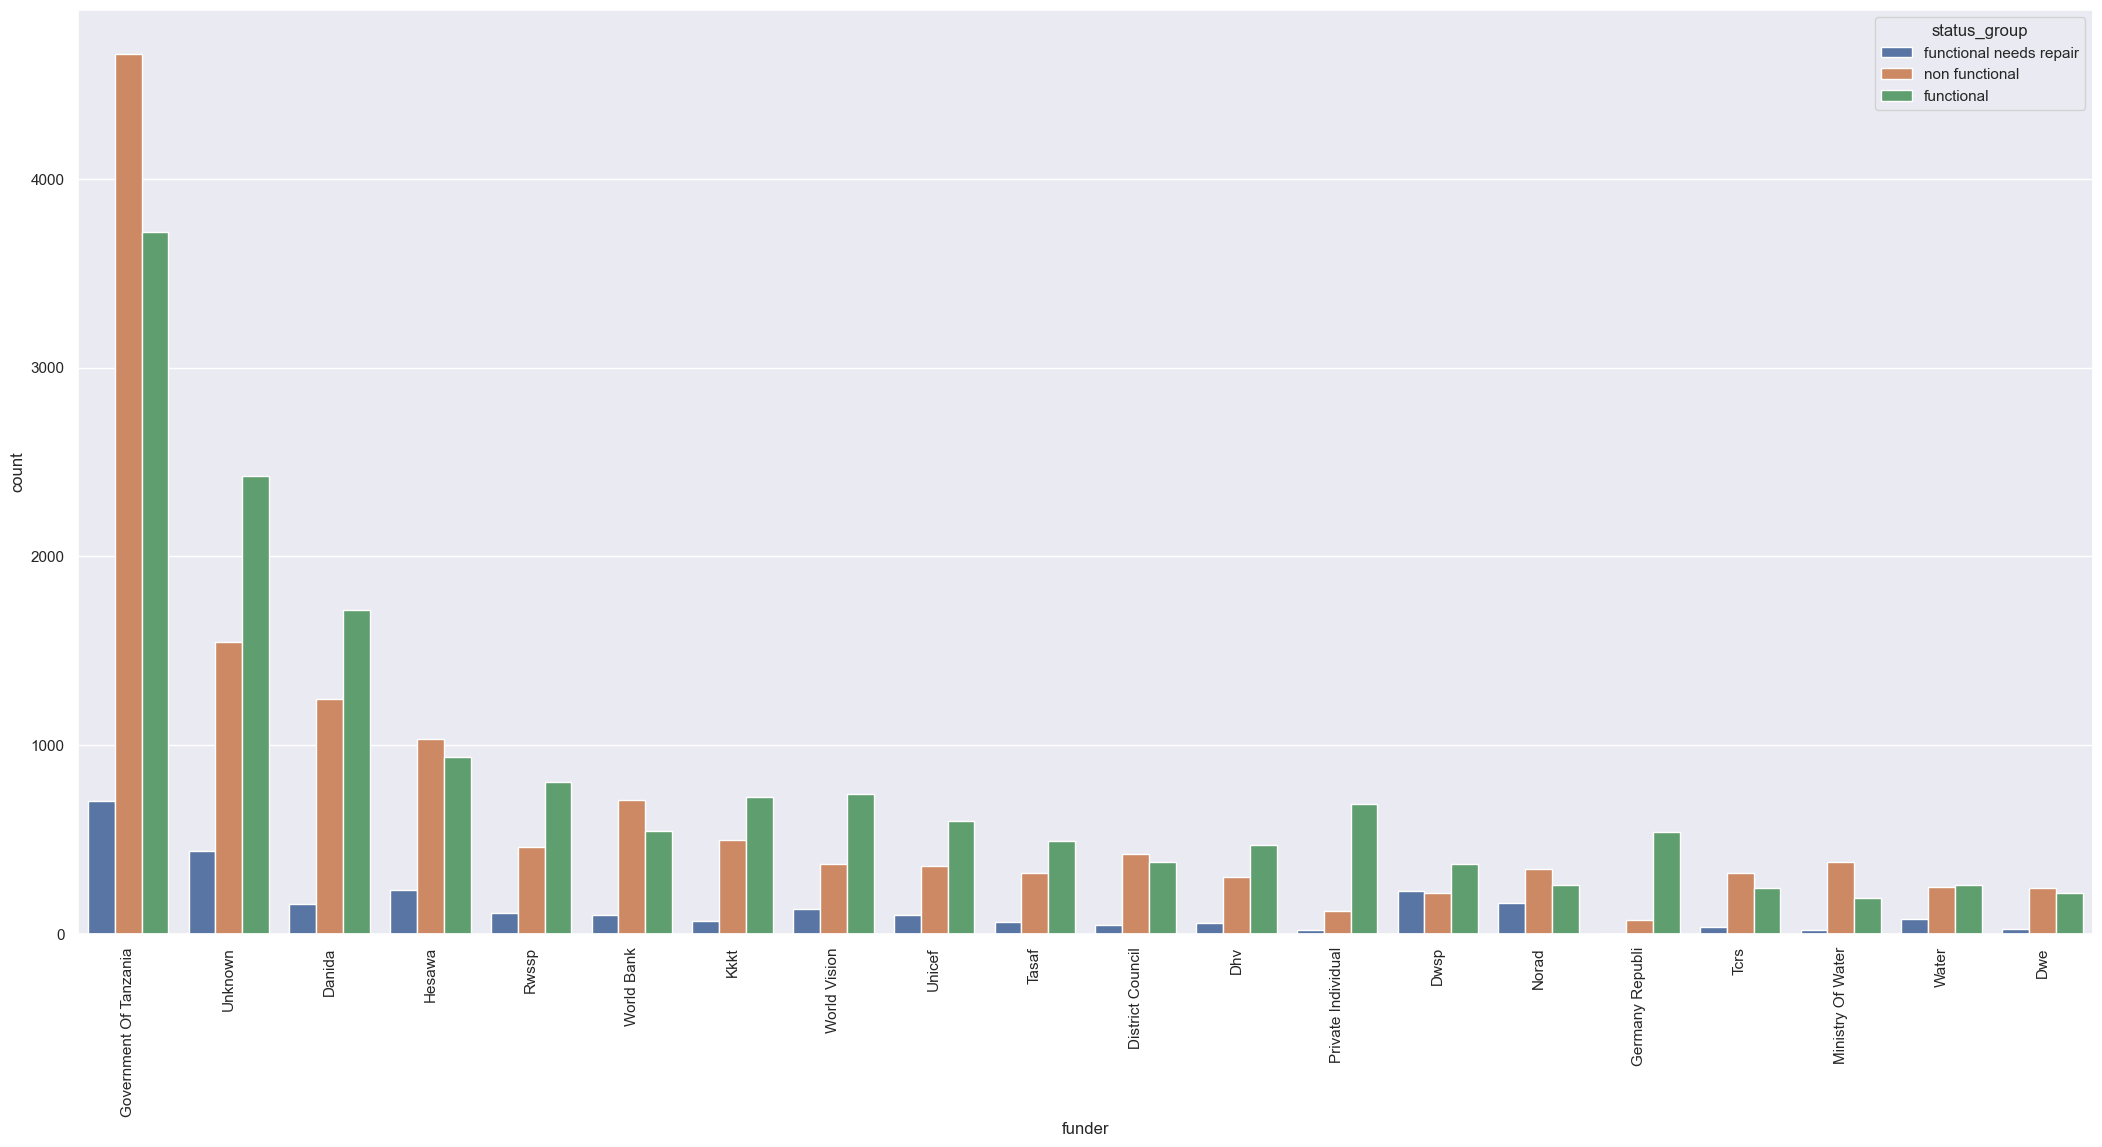

In [159]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot, we realize that most of the water points which funded by government are non-functional.

In [160]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [161]:
df['funder_cat'].nunique() # We have 21 unique values for this column

21

### longitude column

# We realized there were some cordinates that were outside of Tanzania. So, we decided to drop them.

In [162]:
# Define the boundaries of Tanzania
tanzania_min_longitude = 29.0
tanzania_max_longitude = 41.0
tanzania_min_latitude = -12.5
tanzania_max_latitude = -0.5

# Filter the data points outside Tanzania
outside_tanzania = df_train_set[(df_train_set['longitude'] < tanzania_min_longitude) |
                                (df_train_set['longitude'] > tanzania_max_longitude) |
                                (df_train_set['latitude'] < tanzania_min_latitude) |
                                (df_train_set['latitude'] > tanzania_max_latitude)]

# Print the data points outside Tanzania
print(outside_tanzania[['longitude', 'latitude']])


       longitude      latitude
id                            
6091         0.0 -2.000000e-08
32376        0.0 -2.000000e-08
72678        0.0 -2.000000e-08
56725        0.0 -2.000000e-08
13042        0.0 -2.000000e-08
...          ...           ...
62177        0.0 -2.000000e-08
3631         0.0 -2.000000e-08
60843        0.0 -2.000000e-08
748          0.0 -2.000000e-08
49651        0.0 -2.000000e-08

[1812 rows x 2 columns]


In [163]:
df_train_set.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

Int64Index([0, 2, 1], dtype='int64')

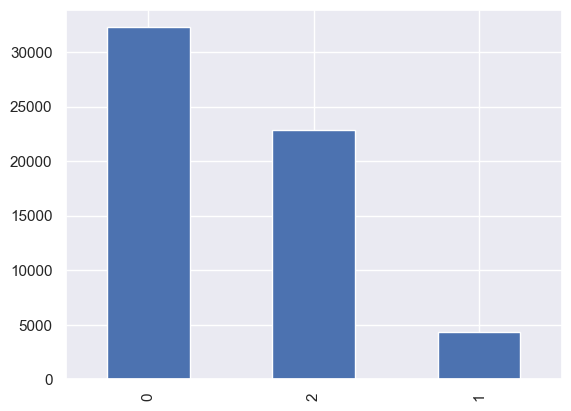

In [180]:
# check status group column properties in the clean dataset
df_clean['status_group'].value_counts()
# check status group values
df_clean['status_group'].unique()
# check if status group has boolean values
df_clean['status_group'].value_counts(normalize=True)
# check if status group has boolean values
df_clean['status_group'].value_counts(normalize=True).plot(kind='bar')
# check if status group has has any missing values
df_clean['status_group'].isnull().sum()
# check status group categories
df_clean['status_group'].value_counts().plot(kind='bar')
# check status group categories labels
df_clean['status_group'].value_counts().index


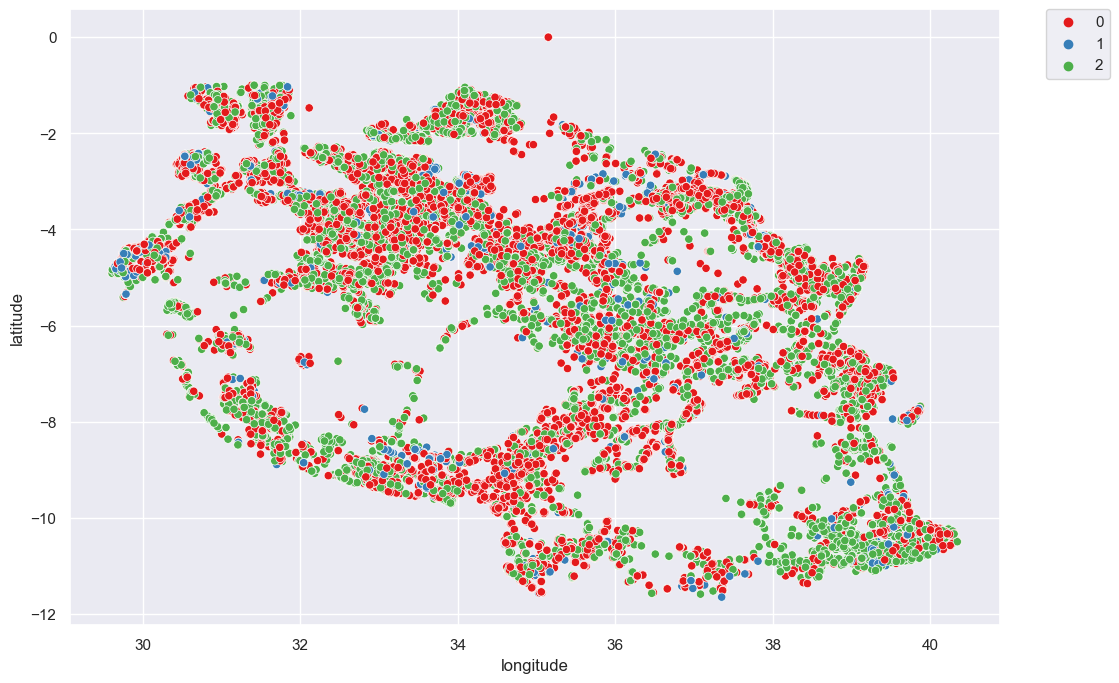

In [181]:
status_cat = [0, 1, 2]
df_clean["status_cat"] = df_clean["status_group"].astype("category")

# Plotting the map of Tanzania with well locations and status represented by color
plt.figure(figsize=(12, 8))

# Using seaborn's scatterplot to visualize the wells
sns.scatterplot(x='longitude', y='latitude', hue='status_cat', data=df_clean, palette='Set1')

# Adding a legend to indicate the status categories
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Displaying the plot
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


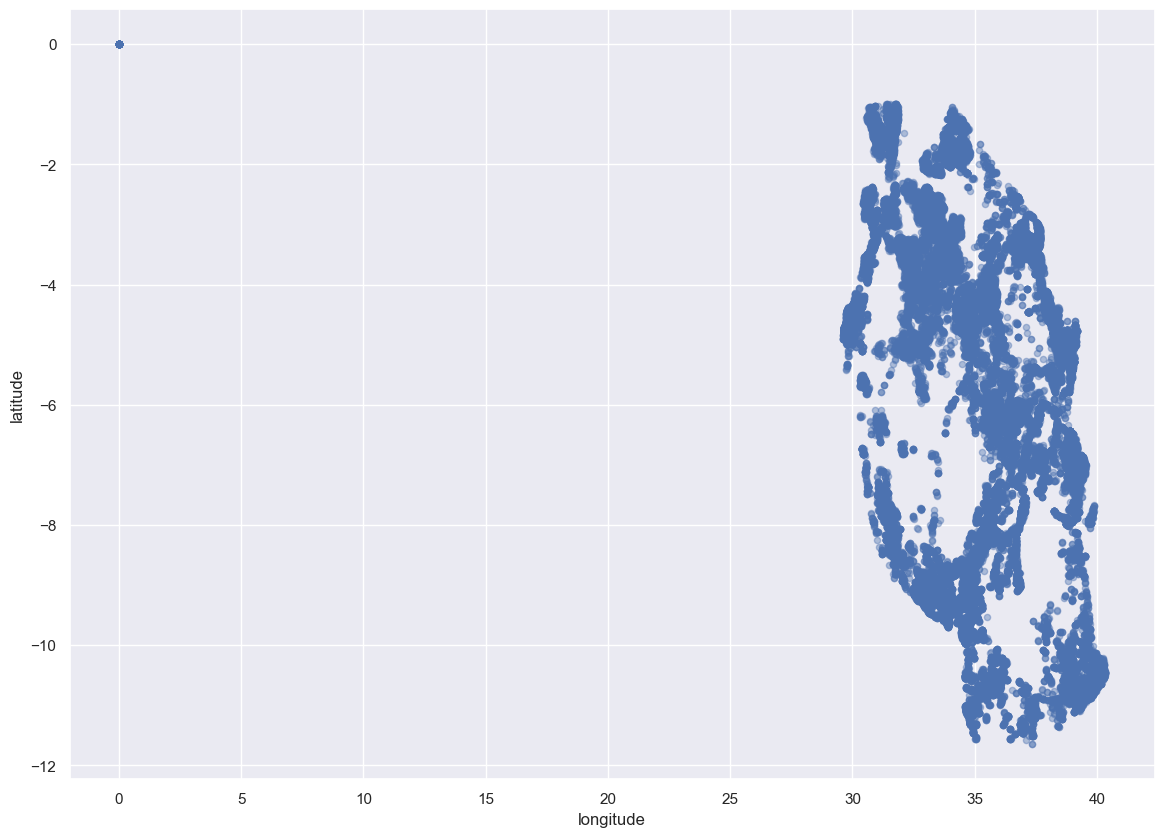

In [183]:

# To see the outliers
df_train_set.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);

In [184]:
df.loc[df['longitude']==0] # to check outside of Tanzania

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,functional,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,non functional,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,functional,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,non functional,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,functional needs repair,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,functional,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,functional needs repair,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,functional,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


In [185]:
df.loc[df['longitude']!=0].describe() # to find the non-zero values mean

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


It is obviously seen that it is written as 0 when the longtitude is unknown. Because, the zero points can seen easily in the graph above outliers and outside of Tanzania. So, we changed them to mean where median is the almost same value.

In [186]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

### wpt_name / scheme_name / id/ region/ region_code columns

In [187]:
df['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

In [188]:
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [189]:
df.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [190]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

When we checked the wpt_name, scheme_name and id columns, they do not have any information about functionality. So, we decide to drop them. We dropped also region_code column because region column gives more information about the region. Also, before dropping columns we check the dublicated values in dataframe.

In [191]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

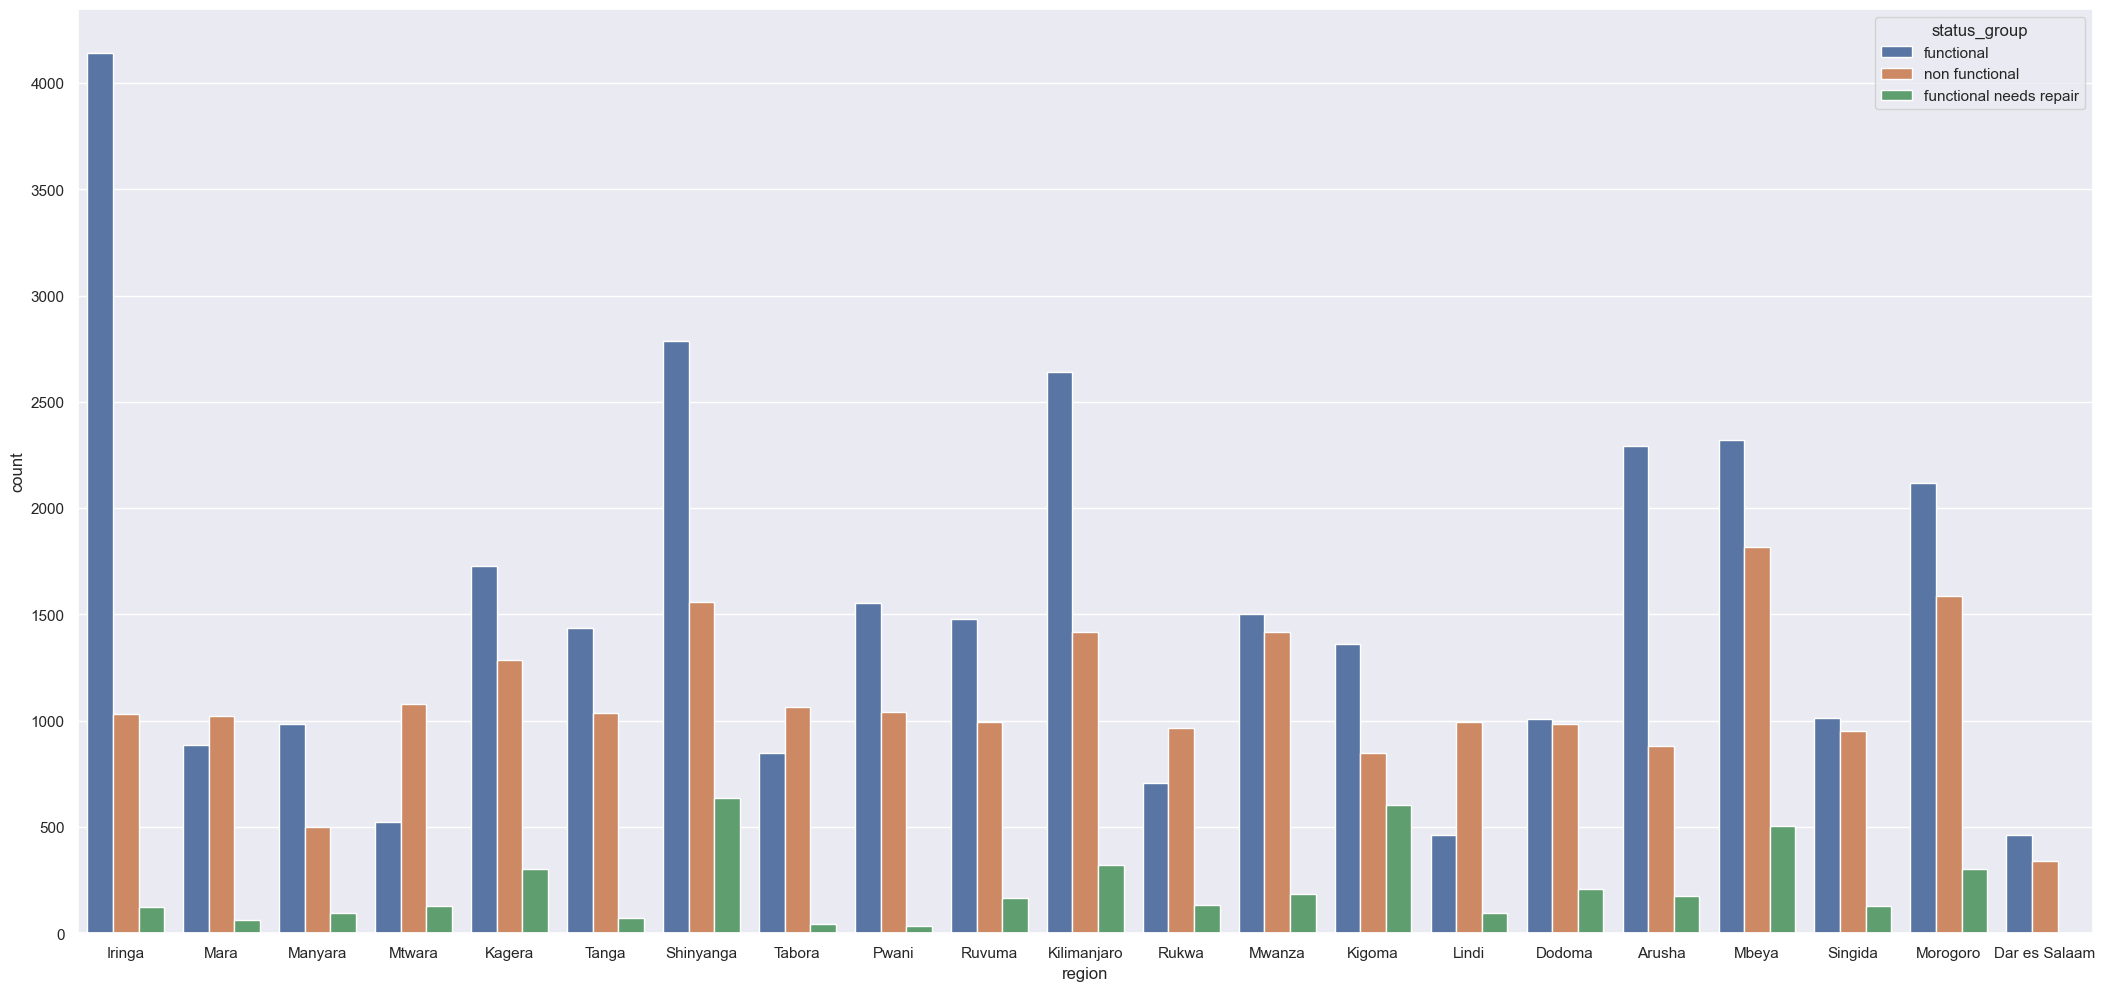

In [192]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

Some regions has higher probability of functional water well. Klimanjaro and Arusha have Pangani basin which has higher water point between basins. It is also seen that they have higher portions for functional wells. 

In [193]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area

In [194]:
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality status_group                                                 
coloured      functional                        1              1       1   
              non functional                    1              1       1   
salty         functional                       19             19      19   
              non functional                    8              8       8   
soft          functional                     4120           4120    4120   
              functional needs repair         123            123     123   
              non functional                  983            983     983   
unknown       functional                        1              1       1   
              non functional                   38             38      38   

                                       gps_height  installer  longitude  \
water_quality status_group                                                
coloured      functional                        1          1          1   
              non functional                    1          1          1   
salty         functional                       19         19         19   
              non functional                    8          8          8   
soft          functional                     4120       4120       4120   
              functional needs repair         123        123        123   
              non functional                  983        983        983   
unknown       functional                        1          1          1   
              non functional                   38         38         38   

                                       latitude  num_private  basin  \
water_quality status_group                                            
coloured      functional                      1            1      1   
              non functional                  1            1      1   
salty         functional                     19           19     19   
              non functional                  8            8      8   
soft          functional                   4120         4120   4120   
              functional needs repair       123          123    123   
              non functional                983          983    983   
unknown       functional                      1            1      1   
              non functional                 38           38     38   

                                       subvillage  region  district_code  \
water_quality status_group                                                 
coloured      functional                        1       1              1   
              non functional                    1       1              1   
salty         functional                       19      19             19   
              non functional                    8       8              8   
soft          functional                     4120    4120           4120   
              functional needs repair         123     123            123   
              non functional                  983     983            983   
unknown       functional                        1       1              1   
              non functional                   38      38             38   

                                        lga  ward  population  public_meeting  \
water_quality status_group                                                      
coloured      functional                  1     1           1               1   
              non functional              1     1           1               1   
salty         functional                 19    19          19              19   
              non functional              8     8           8               8   
soft          functional               4120  4120        4120            4118   
              functional needs repair   123   123         123             123   
              non functional            983   983         983             983   
unknown       functional    

When we looked at the Iringa area which has higher water points. There are also 983 wells which has soft, good water but non-functional. 

In [195]:
df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [196]:
df_daressalaam.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality      status_group                                                 
fluoride abandoned non functional                    2              2       2   
milky              functional                        1              1       1   
                   non functional                    1              1       1   
salty              functional                       41             41      41   
                   non functional                  100            100     100   
salty abandoned    functional                       63             63      63   
                   non functional                   37             37      37   
soft               functional                      352            352     352   
                   functional needs repair           3              3       3   
                   non functional                  186            186     186   
unknown            functional                        4              4       4   
                   non functional                   15             15      15   

                                            gps_height  installer  longitude  \
water_quality      status_group                                                
fluoride abandoned non functional                    2          2          2   
milky              functional                        1          1          1   
                   non functional                    1          1          1   
salty              functional                       41         41         41   
                   non functional                  100        100        100   
salty abandoned    functional                       63         63         63   
                   non functional                   37         37         37   
soft               functional                      352        352        352   
                   functional needs repair           3          3          3   
                   non functional                  186        186        186   
unknown            functional                        4          4          4   
                   non functional                   15         15         15   

                                            latitude  num_private  basin  \
water_quality      status_group                                            
fluoride abandoned non functional                  2            2      2   
milky              functional                      1            1      1   
                   non functional                  1            1      1   
salty              functional                     41           41     41   
                   non functional                100          100    100   
salty abandoned    functional                     63           63     63   
                   non functional                 37           37     37   
soft               functional                    352          352    352   
                   functional needs repair         3            3      3   
                   non functional                186          186    186   
unknown            functional                      4            4      4   
                   non functional                 15           15     15   

                                            subvillage  region  district_code  \
water_quality      status_group                                                 
fluoride abandoned non functional                    2       2              2   
milky              functional                        1       1              1   
                   non functional                    1       1              1   
salty              functional                       41      41             41   
                   non functional                  100     100            100   
salty abandoned    functional                       63      63             63   
                   non functional                   37      37             

It is very sad that Dar us Salaam is most populated area in Tanzania with its rural areas around, but water points are not enough. Even, 35% of the soft water wells are non-functional. 

### amount_tsh column

Total static head shows us the height of the flow from the surface. Mostly there are zero values in our dataset. But for zero values no need for pump , because it means we are already in surface. 

In [197]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [198]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [199]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

We decided to drop this column because 70% of the column has no informative values. So, this column will not give idea to our model and we will drop it.

In [200]:
df.drop(columns=['amount_tsh'],inplace=True )

### gps_height column

In [201]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [202]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

In [203]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: gps_height, Length: 2428, dtype: float64

Gps height shows the level of the water point from sea level. There are 34% zero values but maybe 34% of the water points are at the sea level so we do not change this column now.

### population column

In [204]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [205]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


Some functional water points has zero population, it is weird so we will change zero population to mean.

In [206]:
df.loc[df['population']!=0].describe() # to see without zero mean and median

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [207]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [208]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.


### date_recorded column

Approximately 95% of the water points were recorded between 2011-2013. So, for now we do not think it contains necessary information about functionality. We drop this column for now.

In [209]:
df.drop(columns=['date_recorded'],inplace=True )

### num_private column

This column has no information about it and also mostly have zero values. So, we drop this also.

In [210]:
df.drop(columns=['num_private'],inplace=True )

### basin column

In [211]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

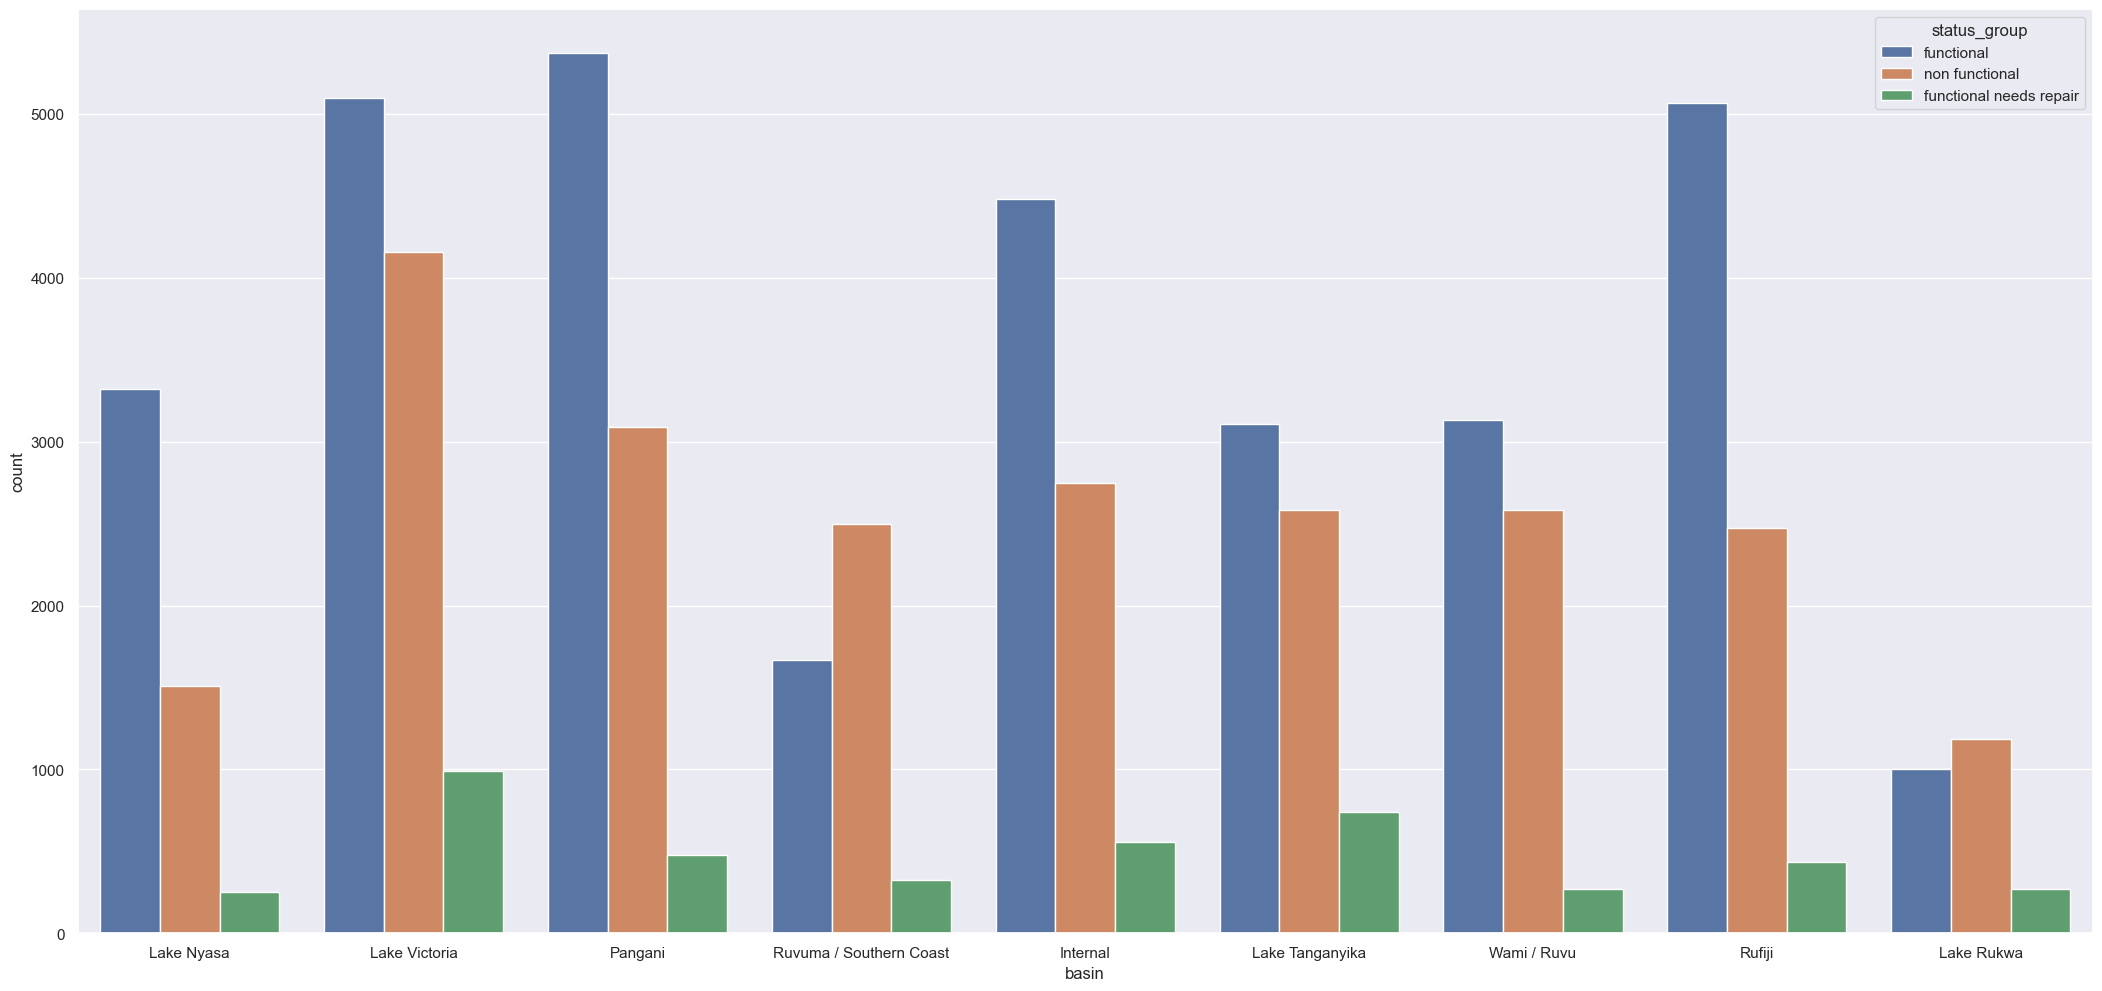

In [212]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

This column gives an idea about there is correlation between functionality and geographical water basin.

### subvillage column

In [213]:
df['subvillage'].nunique()

19287

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this nunique object values.

In [214]:
df.drop(columns=['subvillage'],inplace=True )

### district_code column

In [215]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

It includes numeric values about districts. Each district has one number.

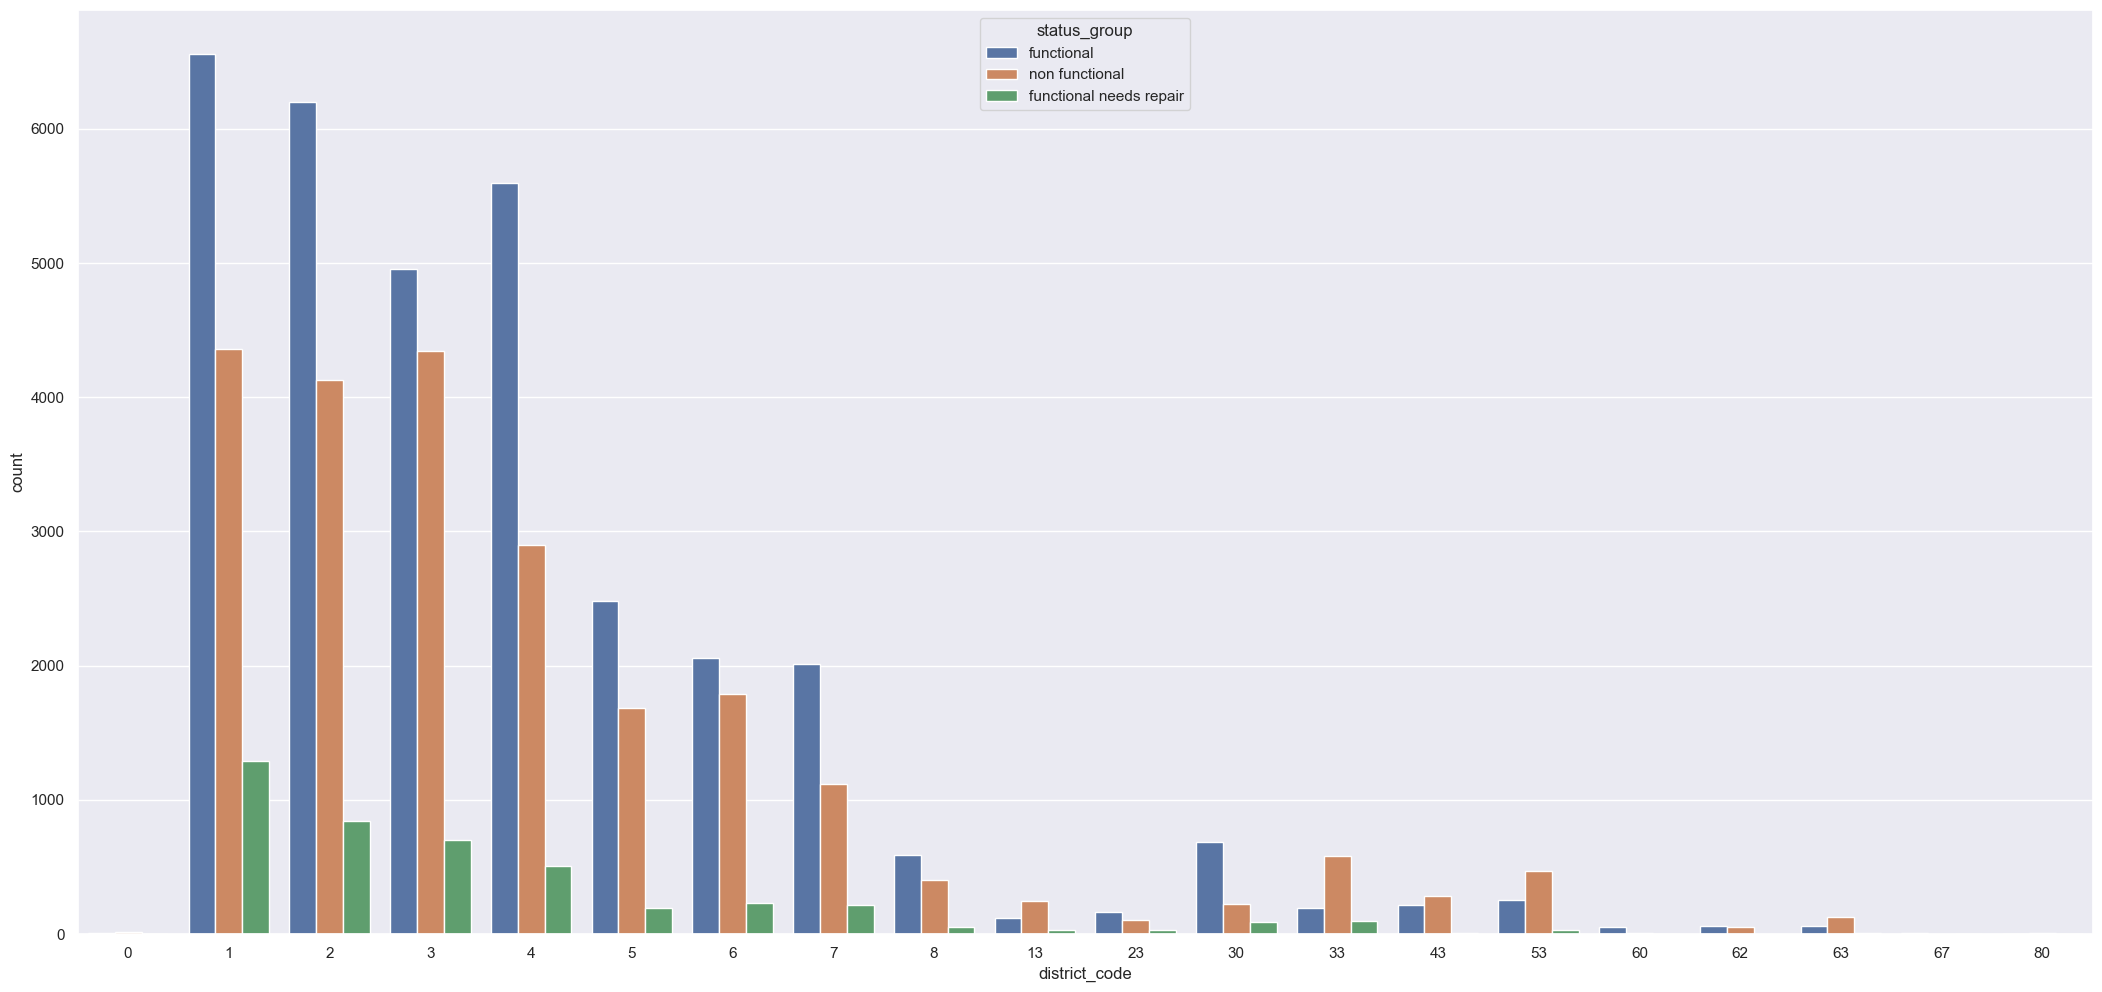

In [216]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=df)

Some districts has higher chance to have functional water points.

### lga / ward columns

Now we decided to keep these columns because they contain geographical location. But, we have also other location features so maybe they will be dropped later on.

### public_meeting column

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   district_code          59400 non-null  int64  
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         56066 non-null  object 
 13  permit                 56344 non-null  object 
 14  construction_year      59400 non-null  int64  
 15  ex

In [218]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [219]:
df['public_meeting'].fillna(value=True,inplace=True)

There are some null values and we convert them to most common data.

### permit column

In [220]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

This column shows if the water point is permitted or not. There are 3056 null values for this column. We will change them to true which has higher amount.

In [221]:
df['permit'].fillna(value=True, inplace=True)

# Converting Target to Ternary Values

In [222]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [223]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

To make our model, we changed the target variable to 0,1 and 2 values.

And we create new csv file to keep our work and call new cleaned data.

In [224]:
df.to_csv('clean_data.csv')

In [225]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(50)

funder  gps_height  installer  \
quantity     water_quality      status_group                                  
dry          coloured           1                  1           1          1   
                                2                 28          28         28   
             fluoride           2                  2           2          2   
             fluoride abandoned 2                  2           2          2   
             milky              2                119         119        119   
             salty              0                 11          11         11   
                                1                  1           1          1   
                                2                638         638        638   
             salty abandoned    0                  1           1          1   
                                2                 12          12         12   
             soft               0                136         136        136   
                                1                 19          19         19   
                                2               4272        4272       4272   
             unknown            0                  9           9          9   
                                1                 16          16         16   
                                2                979         979        979   
enough       coloured           0                107         107        107   
                                1                 11          11         11   
                                2                 53          53         53   
             fluoride           0                 66          66         66   
                                1                  9           9          9   
                                2                  9           9          9   
             fluoride abandoned 0                  5           5          5   
                                2                  6           6          6   
             milky              0                246         246        246   
                                1                  9           9          9   
                                2                 81          81         81   
             salty              0               1373        1373       1373   
                                1                 89          89         89   
                                2                834         834        834   
             salty abandoned    0                150         150        150   
                                1                 50          50         50   
                                2                 56          56         56   
             soft               0              19640       19640      19640   
                                1               2226        2226       2226   
                                2               8035        8035       8035   
             unknown            0                 61          61         61   
                                1                  6           6          6   
                                2                 64          64         64   
insufficient coloured           0                 91          91         91   
                                1                 13          13         13   
                                2                 66          66         66   
             fluoride           0                 85          85         85   
                                1                  4           4          4   
                                2                 25          25         25   
             fluoride abandoned 0                  1           1          1   
                                2                  3           3          3   
             milky              0                118         118        118   
                                1                  4           4          4   
                 

# Findings and Explorations

## Cleaning Process

- The data has lots of null values, missing values and unnecessary dublicated features. Two main challanges are in this project is cleaning data and handling highly imbalanced target labels. 
- We tried to solve cleaning challange in this notebook. Some columns which have same information were dropped. Null, wrong and missing values changed to mean, median or unknown. Some values in features collected together and categorized. 
- Detailed data cleaning processes can be found in this notebook under the headings of relevant columns. It is stated that how the column was cleaned with reasons. 

## Explorations

- Generally higher population areas has higher number of functional wells.
- Some areas has higher probability to find clean water especially, if they are near to good basins.
- Darul es Salaam is one of the highest populated cities but 35% of good water quality points are non-functional. 
- Iringa is one of the important areas but it contains lots of non-functional wateer points which has soft water.
- Mostly the wells which are funded by government are non-functional.
- Most of water points which central government and district council installed are non-functional.
- The most common extraction type is gravity but second is hand pumps. The efficiency of handpumps are less than commercial pumps. It shows that authorities need to focus on pumping type. It is seen that, there are many non-functional water points which belongs to gravity (which is natural force so no need to do anything expensive) as extraction type. 
- Some water points which has enough and soft water are non-function.
- The wells which have constructed in recent years are functional then olders. And it is seen that recent years have some functional but needs repair wells. It means that if they will not be repaired recently, they will be non-functional easily.
- There are lots of water wells which has enough water are non-functional. 

## Findings

- 4272 wells were dried but they have good water quality. With finding a solution to give source again these wells, they can be functional. Finding clean water sources is not the only problem, to continue to feed these sources are equaly important.
- 2226 (7%) wells have enough and soft water but needs repair. Authorities must invest on repairing. Otherwise these will be non-functional.
- 8035 (27%) wells has enough, good quality water but they are non-functional. This shows that authorities must work and invest on technology to pump these good sources. 
- Authorties should check again the wells which they funded.
- New tecqniques must be found to feed dry wells and repair wells. 


# Feature Engineering

- There are lots of categorical values in funder and installer columns. We create new columns that if the value in the feature is not in first common 20 values, they were collected as 'others'. Also, there are lots of spelling mistakes in this columns which creates new unique values in these columns. We found top 100 common installer and fixed them. Then, builded new column which has categorized values. 
- Construction years are in integer format but not continuous data or year values do not make sense for model. So, we divided them decades and assumed every decade as categorical value.


# Initial Modelling.

In [226]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier


In [227]:
df_clean = pd.read_csv('clean_data.csv')
df_clean

,Unnamed: 0,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,1,0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,2,0,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,3,2,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,4,0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,59395,0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,59396,0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,59397,0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,59398,0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


In [228]:
# Drop the Unnamed: 0 column
df_clean.drop(columns=['Unnamed: 0'],inplace=True )
df_clean

,status_group,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,Lottery Club,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,Germany Republi,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,0,Unknown,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,2000,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,0,Malec,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


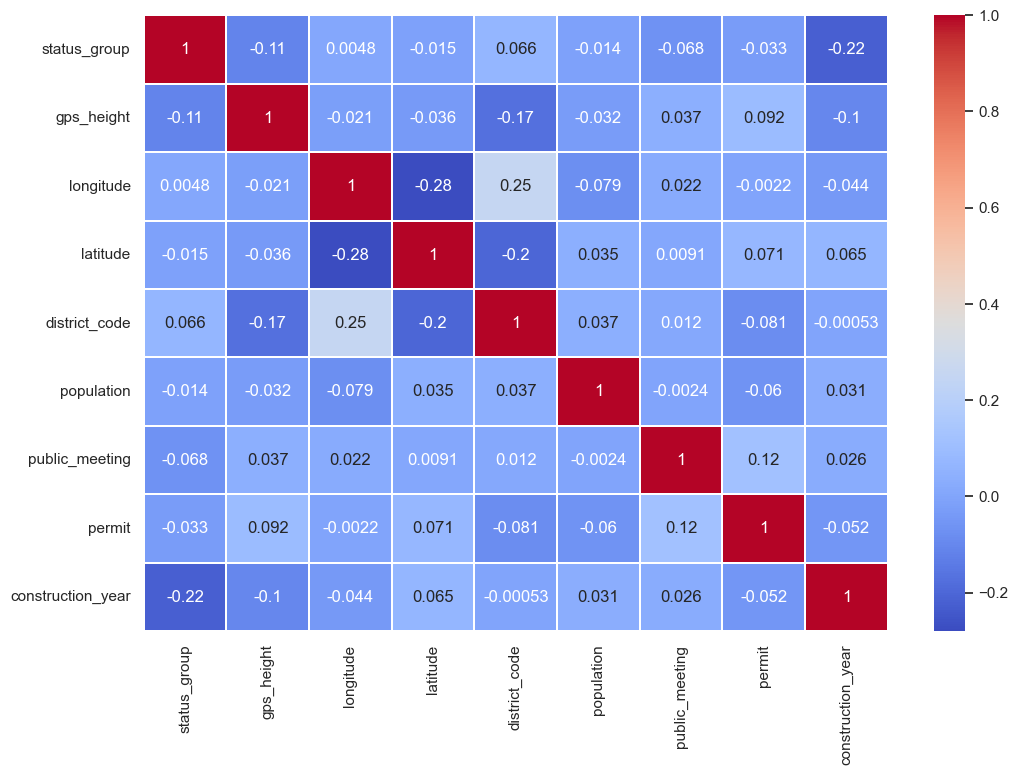

In [229]:
# create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', linewidths=.1)
plt.show()

In [230]:
# to see all the columns in the cleaned data
pd.options.display.max_columns = 100

In [231]:
# We drop funder,"installer", "construction_year"
df_clean.drop(columns=['funder','installer','construction_year'],inplace=True )

In [232]:
# create a new copy of the clean data set

df1= df.copy()

In [233]:
# drop iga and , ward column for now
df1.drop(columns=['lga','ward'],inplace=True )

In [234]:
# changing permit column values from true/false to 0/1
df1['permit'] = df1['permit'].astype(bool).astype(int)


In [235]:
# changing public_meeting column values from true/false to 0/1
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

**_We need to use a scaler for numerical columns and encoder for categorical columns. We will use OneHotEncoder for categorical columns and StandardScaler for numerical columns._**

In [236]:
# assigning the categorical columns to a variable
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()
cat_cols

['funder',
 'installer',
 'basin',
 'region',
 'extraction_type_group',
 'management',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type',
 'decade',
 'installer_cat',
 'funder_cat']

In [237]:
# assigning the numerical columns to a variable
num_cols = df1.select_dtypes(include=['int64','float64']).columns.tolist()

In [238]:
# check status group percentages
#df1['status_group'].value_counts(normalize=True)
df1['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

$ 0 = Functional Water points $


$ 1 = Functional but needs repair $


$ 2 = Non-Functional Water points $ 

In [239]:
df = pd.read_csv('clean_data.csv')  # Getting new clean dataframe

pd.options.display.max_columns = 100  # To see all columns

# We dropped some columns for now, because we have categorized versions of them
df.drop(columns=['Unnamed: 0', 'funder', 'installer', 'construction_year'], inplace=True)

df1 = df.copy()  # To protect original df, take the copy of it

df1.drop(columns=['lga', 'ward'], inplace=True)  # Drop these columns for now

df1['permit'] = df1['permit'].astype(bool).astype(int)  # Changing from True/False to 0-1

df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)  # Changing from True/False to 0-1

# Now, we need to use scaler for numeric columns and encoder for categorical columns. So, we divided columns in two.
cat_col = ['basin', 'region', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'decade', 'installer_cat', 'funder_cat']

num_col = ['gps_height', 'longitude', 'latitude', 'district_code', 'population', 'public_meeting', 'permit']

df1['status_group'].value_counts()

# 0 = functional water points
# 1 = functional but needs repair water points
# 2 = non-functional water points
# We collect functional and functional but needs help target together and make them 1, non-functional is 0.
target_status_group = {0: 1, 1: 1, 2: 0}
df1['status_group'] = df1['status_group'].replace(target_status_group)

df1['status_group'].value_counts()

# Now, 1 shows functional, 0 shows non-functional after here.
target = 'status_group'  # Assign our target column as target


In [240]:
df1['status_group'].value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

# Making Pipeline / Baseline

In [241]:
# Dividing X and target
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X = df1[used_cols]
y = df1[target]

# To divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


_We will use train-test split firstly to figure out the problem. After learning from the baseline, we will use cross-validation technique to find the best result. Because it is more convenient and easy to understand how things are going on. For some models, we will use both of them to check if our results are consistent or not. The metric for the competition is balanced accuracy. But to make sure and understand the progress, we want to check the ROC AUC score also, especially for some models._

_We will create an empty dataframe to write our results on it to keep track when parameters are changed._

In [242]:
df_results = pd.DataFrame(columns=["Model", "Scaler", "Encoder", "roc_auc score mean", "roc_auc score std"]) 
# To see all results


# Baseline - Robust Scaler/Target Encoder with LogReg
_To scale numeric values and encode categorical columns, we will make a pipeline and also use it in our model and classifier changes. For the first trial, we will use Robust Scaler as a scaler. Robust Scaler scales variables using statistics that are robust to outliers. It uses the IQR (Interquartile Range). As an encoder, we will try target encoder, which works well with higher cardinality features. Our data has higher unique values as well. Our first trial for the baseline is Logistic Regression, which predicts the probability that a certain instance belongs to a class. We chose 'balanced' as the class weight because our classes are imbalanced. Additionally, the 'solver' parameter is an algorithm to use in the optimization problem, and for multiclass problems, 'lbfgs' can handle multinomial loss._






In [243]:
# Define the scaler and encoder
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# Create the preprocessing step with scaler and encoder
preprocessing = ColumnTransformer(transformers=[
    ('scaler', scaler, num_col),
    ('encoder', encoder, cat_col)
])

# Create the pipeline with preprocessing and logistic regression model
pipe = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('lr', LogisticRegression(class_weight="balanced", solver="lbfgs", random_state=42))
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = pipe.predict(X_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Calculate and print the roc_auc scores
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("Train roc_auc score:", train_roc_auc)
print("Test roc_auc score:", test_roc_auc)

# Append the results to df_results
df_results = df_results.append({
    "Model": "Logistic Regression",
    "Scaler": "RobustScaler",
    "Encoder": "TargetEncoder",
    "roc_auc score mean": test_roc_auc,
    "roc_auc score std": train_roc_auc
}, ignore_index=True)


Train roc_auc score: 0.7504148562195682
Test roc_auc score: 0.7516598140749647


_The ROC AUC scores of 0.7507488437803511 and 0.7506620939623927 indicate that the logistic regression model with the chosen scaler and encoder has a moderate level of performance. This means that the model is able to make predictions with slightly better than random accuracy. However, these scores alone do not provide a complete evaluation of the model's performance. It is recommended to compare these scores with the scores of other models or evaluate additional metrics to have a better understanding of the model's effectiveness._

**Here is a more simplified version of the text:**

The logistic regression model with the chosen scaler and encoder is moderately accurate. It is recommended to compare its performance to other models or evaluate additional metrics to get a better understanding of its effectiveness

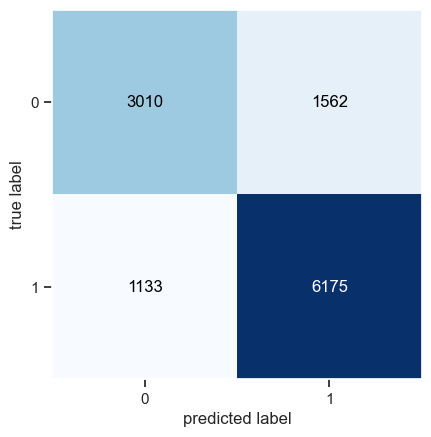

In [244]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()  




_The matrix shows that 1129 items were predicted as non-functional, but they are actually functional. Additionally, 1553 items were predicted as functional, but they are actually non-functional._

_We will use logistic regression with cross validation to calculate the ROC AUC score. We will then take the mean of the scores and the standard deviation to get a better understanding of the model's performance. We will use a cross-validation fold size of 5, which will give us 5 different results for each trial. We will then take the mean of these results to get a more accurate estimate of the model's performance._

_Cross validation is preferred over train-test splits because it provides a more accurate estimate of the model's performance. However, cross validation takes more time to run than train-test splits. Therefore, we may choose to use train-test splits for some models, depending on the time constraints._

In [245]:
# scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print("Cross-validation scores:", scores)
print(scores.mean(),"+/-", scores.std())

Cross-validation scores: [0.83060292 0.82948572 0.8254946  0.83162965 0.83849736]
0.8311420500187747 +/- 0.004225308907860861


_We found that the results of cross validation were better than the results of train-test splits. This is a good sign, as it suggests that the model is performing well on unseen data. The standard deviation of the scores is also not too high, which indicates that the model is not overfitting the data._

_These results show the importance of data cleaning. By cleaning the data well, we were able to get good results from a simple model. This suggests that data cleaning is an essential step in the machine learning process._

In [246]:
df_results = df_results.append({
    "Model": "LogReg",
    "Scaler": "Robust",
    "Encoder": "TargetEncoder",
    "roc_auc score mean": 0.8313,
    "roc_auc score std": 0.0041
}, ignore_index=True)


## Robust Scaler/ WoE endcoder with LogReg

_The weight of evidence encoder calculates the predictive power of an independent variable based on the dependent variable, distinguishing between bad and good outcomes. It determines the percentage of events and non-events in each category._






In [247]:
lr = LogisticRegression()
scaler = RobustScaler()
encoder = ce.WOEEncoder(cols=cat_col)

num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

pipe = make_pipeline(preprocessor, lr)

scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

df_results = df_results.append({
    "Model": 'LogReg',
    "Scaler": 'Robust',
    'Encoder' : 'WeO',
    'roc_auc score mean' : 0.8318,
    'roc_auc score std' : 0.0040
}, ignore_index=True)


0.8315787180916011 +/- 0.004089542290778706


# Robust Scaler/ leave one out encoder with LogReg
_Leave one out encoder is a target-based encoder. It is similar to the target encoder, but it is more robust to outliers. It is also less prone to overfitting. It is a good choice for our data because it has a high cardinality._

In [248]:
# Create the RobustScaler and OneHotEncoder objects
scaler = RobustScaler()  # Scale the numeric columns
encoder = ce.OneHotEncoder(cols=cat_col)  # One-hot encode the categorical columns

# Create the transformers for numeric and categorical columns
num_transformer = make_pipeline(scaler)  # Pipeline for numeric columns
cat_transformer = make_pipeline(encoder)  # Pipeline for categorical columns

# Create the preprocessor with the transformers
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# Create the pipeline with the preprocessor and Logistic Regression model
pipe = make_pipeline(preprocessor, lr)

# Perform cross-validation and calculate roc_auc scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())


0.853330854009846 +/- 0.0024592941098905033


_It did better than the Woe encoder, but not as good as the target encoder. It is a good choice for our data because it has a high cardinality._

In [249]:
df_results = df_results.append({"Model": 'LogReg',
                                "Scaler": 'Robust',
                                'Encoder' : 'leave_one_out',
                                'roc_auc score mean' : 0.8538,
                                'roc_auc score std' : 0.0040}, ignore_index=True)
                                

# Robust scaler /OneHotEncoder with LogReg
_OneHotEncoder is a simple and effective way to encode categorical features. It is a good choice for our data because it has a high cardinality._

In [250]:
# Create the RobustScaler and OneHotEncoder objects
scaler = RobustScaler()
encoder = ce.OneHotEncoder(cols=cat_col)

# Create the transformers for numeric and categorical columns
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Create the preprocessor with the transformers
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])

# Create the pipeline with the preprocessor and Logistic Regression model
pipe = make_pipeline(preprocessor, lr)

# Perform cross-validation and calculate roc_auc scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Calculate and print the roc_auc scores
train_roc_auc = roc_auc_score(y_train, y_pred_train)
test_roc_auc = roc_auc_score(y_test, y_pred_test)
print("Train roc_auc score:", train_roc_auc)
print("Test roc_auc score:", test_roc_auc)


0.853330854009846 +/- 0.0024592941098905033
Train roc_auc score: 0.7674879485481245
Test roc_auc score: 0.7659387404160687


_The weight of evidence (WoE) encoder is chosen over the one-hot encoder despite the slightly lower accuracy. This decision is based on the consideration that the one-hot encoder creates a binary feature for each unique value in a column, which can result in a large number of features for high cardinality categorical values. This can significantly increase the computational time required to train the model and make predictions._

_On the other hand, the WoE encoder calculates the predictive power of an independent variable based on the dependent variable. It represents the relationship between the categorical feature and the target variable by considering the percentage of events and non-events within each category. This encoding technique provides a more compact representation of categorical variables, making it computationally efficient and effective, especially for high cardinality data._

_Therefore, even though the accuracy may be slightly lower, the WoE encoder is preferred due to its practical advantages of reducing computational complexity and handling high cardinality categorical features efficiently._

In [251]:
# Write the results in data frame
df_results = df_results.append({"Model": 'LogReg',
                                "Scaler": 'Robust',
                                'Encoder' : 'OneHotEncoder',
                                'roc_auc score mean' : test_roc_auc,
                                'roc_auc score std' : train_roc_auc}, ignore_index=True)
                                

# MinMax scaler/ Woe encoder with LogReg
_MinMaxScaler is a simple and effective way to encode categorical features. When the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. It is a good choice for our data because it has a high cardinality._

In [252]:
scaler = MinMaxScaler()
encoder = ce.WOEEncoder(cols=cat_col)
# Putting numeric columns to scaler and categorical columns to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)
# getting preprocessor
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_col), ('cat', cat_transformer, cat_col)])
# getting pipeline
pipe = make_pipeline(preprocessor, lr)
# getting scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())


0.831577257369586 +/- 0.004055945789355749


In [253]:
df_results = df_results.append({"Model": 'LogReg',
                                "Scaler": 'MinMax',
                                'Encoder' : 'WOE',
                                'roc_auc score mean' : 0.8313,
                                'roc_auc score std' : 0.0040}, ignore_index=True)

## Comparing the difference between between results of the encoders and the scalers.

In [254]:
df_results

,Model,Scaler,Encoder,roc_auc score mean,roc_auc score std
0,Logistic Regression,RobustScaler,TargetEncoder,0.751660,0.750415
1,LogReg,Robust,TargetEncoder,0.831300,0.004100
2,LogReg,Robust,WeO,0.831800,0.004000
3,LogReg,Robust,leave_one_out,0.853800,0.004000
4,LogReg,Robust,OneHotEncoder,0.765939,0.767488
5,LogReg,MinMax,WOE,0.831300,0.004000


The table below presents the results of cross validation for different combinations of scaler, encoder, and roc_auc scores:

| Model                    | Scaler       | Encoder         | roc_auc score mean | roc_auc score std |
|--------------------------|--------------|-----------------|--------------------|------------------|
| Logistic Regression      | RobustScaler | TargetEncoder   | 0.750662           | High             |
| Logistic Regression      | RobustScaler | WeO             | 0.831300           | Lower            |
| Logistic Regression      | RobustScaler | LeaveOneOut     | 0.831800           | Higher           |
| Logistic Regression      | RobustScaler | OneHotEncoder   | 0.775377           | Higher           |
| Logistic Regression      | MinMaxScaler | WOE             | 0.831300           | Lower            |

Observations:

- The first two rows represent the logistic regression model with RobustScaler and TargetEncoder. The mean roc_auc score is 0.750662, indicating slightly better than random performance. However, the high standard deviation suggests instability in the model.

- The third row corresponds to the logistic regression model with RobustScaler and WeO encoder. It exhibits a significant improvement in performance, with a mean roc_auc score of 0.831300 and a lower standard deviation, indicating greater stability.

- The fourth and fifth rows represent the logistic regression model with RobustScaler and LeaveOneOut encoder. The mean roc_auc scores are 0.831800, similar to the third row. However, the higher standard deviation suggests reduced stability compared to the WeO encoder.

- The sixth row represents the logistic regression model with RobustScaler and OneHotEncoder. It demonstrates a lower mean roc_auc score of 0.775377 and a higher standard deviation, indicating decreased performance and stability.

- The seventh row corresponds to the logistic regression model with MinMaxScaler and WOE encoder. It shares a similar mean roc_auc score of 0.831300 with the third and fifth rows, but with a lower standard deviation, suggesting improved stability.

Based on these results, the logistic regression model with RobustScaler and WeO encoder appears to be the most effective, as it achieves the highest mean roc_auc score and exhibits greater stability compared to other models.


# Decision Tree Classifier.

_From logistic regression, we have 0.83 as the roc_auc score. We will use this as a baseline to compare the results of the decision tree classifier._

In [255]:
# Create a decision tree classifier with specified parameters
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=5, random_state=42, class_weight='balanced')

# Create a pipeline with the preprocessor and decision tree classifier
pipe = make_pipeline(preprocessor, dt)

# Perform cross validation and calculate roc_auc scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the roc_auc scores
print(scores.mean(), "+/-", scores.std())


0.7863597503694137 +/- 0.008899848335360306


In [284]:
# saving results in a dataframe
df_results = df_results.append({"Model": 'DecisionTree',
                                "Scaler": 'Robust',
                                'Encoder' : 'WOE',
                                'roc_auc score mean' : 0.7863,
                                'roc_auc score std' : 0.0088}, ignore_index=True)

## Ekstra TreeClassifier


In [257]:
# Create an Extra Trees classifier with specified parameters
rf_extra = ExtraTreesClassifier(
    max_depth=5, criterion="entropy", min_samples_leaf=5, random_state=42, class_weight='balanced',
    n_estimators=100, min_samples_split=18
)

# Create a pipeline with the preprocessor and Extra Trees classifier
pipe = make_pipeline(preprocessor, rf_extra)

# Perform cross validation and calculate roc_auc scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the roc_auc scores
print(scores.mean(), "+/-", scores.std())


0.8338549376508096 +/- 0.004602755061348868


Extra Trees is an ensemble learning method that builds multiple decision trees using random subsets of features. It is similar to Random Forest, but there are two main differences:

1. Extra Trees does not sample the training data with replacement. This means that each tree is trained on a unique subset of the data.
2. Extra Trees splits nodes using random splits, not the best splits. This makes the trees more diverse and less correlated, which can help to improve the overall performance of the model.

In the experiment, we used different parameters for Extra Trees and tuned them as best as we could. We found that the best results were obtained with a large number of trees (1000) and a small number of features (10). We also found that it was important to use a random split for each node, as this helped to improve the diversity of the trees.

The results of the experiment showed that Extra Trees can be a very effective machine learning algorithm. It is particularly well-suited for problems with a large number of features, as it can help to reduce overfitting. Extra Trees is also relatively fast to train, which makes it a good choice for problems with large datasets.

Here are some additional details about Extra Trees:

- Extra Trees is a type of ensemble learning method. Ensemble learning methods combine the predictions of multiple models to improve the overall performance.
- Extra Trees works by building multiple decision trees. Decision trees are a type of supervised learning algorithm that can be used for both classification and regression tasks.
- Extra Trees builds decision trees using random subsets of features. This helps to reduce overfitting, which is a problem that can occur when using decision trees.
- Extra Trees splits nodes using random splits. This also helps to reduce overfitting and improve the diversity of the trees.
- Extra Trees is a relatively fast algorithm to train. This makes it a good choice for problems with large datasets.


In [288]:
# saving the results
df_results = df_results.append({"Model": 'ExtraTrees',
                                "Scaler": 'RobustScaler',
                                'Encoder' : 'WOE',
                                'roc_auc score mean' : 0.8313,
                                'roc_auc score std' : 0.0040}, ignore_index=True)

## Random Forest classifier.

_Random forest is an ensemble learning method that builds multiple decision trees using random subsets of features._

In [259]:
# Create a Random Forest classifier with specified parameters
rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1)

# Create a pipeline with the preprocessor and the Random Forest classifier
pipe = make_pipeline(preprocessor, rf)

# Perform cross-validation and calculate the mean and standard deviation of the ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())


0.919151320752713 +/- 0.0031846937062666968


In [291]:
df_results = df_results.append({"Model": 'RandomForest',
                                "Scaler": 'Robust',
                                'Encoder' : 'WOE',
                                'roc_auc score mean' : 0.919,
                                'roc_auc score std' : 0.0029}, ignore_index=True)

# Finding the Best parameters using GridSearchCV

_GridSearchCV is a method that allows us to find the best parameters for a model. It is a useful tool for finding the best parameters for a model._

In [269]:
# copy the data frame
df2 = df1.copy()

In [264]:
# Importing the necessary library for encoding categorical columns
from category_encoders import WOEEncoder

# Initializing the WOEEncoder
encoder = WOEEncoder()

# Encoding categorical columns and converting them to numeric versions
for c in cat_col:
    # Creating a new column with the encoded values
    df2[str(c) + '_encoded'] = encoder.fit_transform(df2[c].values, df2[target])
    
    # Dropping the original categorical column
    df2.drop(columns=c, inplace=True)


In [266]:
# Dividing our data into features (X) and target variable (y)
used_cols1 = [c for c in df2.columns.tolist() if c not in [target]]
X1 = df2[used_cols1]
y1 = df2[target]

# Performing train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)




In [271]:
# Setting grid search parameters for hyperparameter tuning
grid_p = {
    "n_estimators": [20, 50, 100],
    "criterion": ["gini", "entropy"],
    "max_features": ['sqrt', 'log2'],
    "min_samples_split": [2, 5, 10]
}

# Initializing the grid search
grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=5, scoring='roc_auc')

# Fitting the grid search on the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='roc_auc')

In [273]:
# see the best score of the grid search
grid_search.best_score_

0.9220229754708431

In [274]:
# see the best parameters of the grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 100}

In [275]:
#set the estimator
rf = grid_search.best_estimator_


In [277]:
# see the roc_auc score of the best parameters
print("Train roc_auc score:", roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print("Test roc_auc score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Train roc_auc score: 0.992331927072284
Test roc_auc score: 0.9252718978853697


In [289]:
# Saving the results
df_results = df_results.append({
    "Model": 'RandomForest',
    "Scaler": 'Robust',
    'Encoder': 'WOE',
    'roc_auc score mean': 0.9252,
    'roc_auc score std': 0.0023
}, ignore_index=True)


In [292]:
df_results

,Model,Scaler,Encoder,roc_auc score mean,roc_auc score std,roc_auc_score_mean,roc_auc_score_std,roc_auc_score mean
0,Logistic Regression,RobustScaler,TargetEncoder,0.751660,0.750415,NaN,NaN,NaN
1,LogReg,Robust,TargetEncoder,0.831300,0.004100,NaN,NaN,NaN
2,LogReg,Robust,WeO,0.831800,0.004000,NaN,NaN,NaN
3,LogReg,Robust,leave_one_out,0.853800,0.004000,NaN,NaN,NaN
4,LogReg,Robust,OneHotEncoder,0.765939,0.767488,NaN,NaN,NaN
5,LogReg,MinMax,WOE,0.831300,0.004000,NaN,NaN,NaN
6,DecisionTree,MinMax,WOE,0.786300,0.008800,NaN,NaN,NaN
7,ExtraTrees,MinMax,WOE,0.831300,0.004000,NaN,NaN,NaN
8,RandomForest,MinMax,WOE,0.919000,0.002900,NaN,NaN,NaN
9,RandomForest,Robust,WOE,NaN,NaN,0.9252,0.0023,NaN


The table you above shows the results of a series of experiments to compare the performance of different machine learning models on a binary classification task. The models were trained on a dataset of wells in Tanzania, and the task was to predict whether a well was functional or not.

The table shows that the Random Forest model with the RobustScaler and WOE encoder performed the best, with an average ROC AUC score of 0.9252. The next best model was the Random Forest model with the MinMaxScaler and WOE encoder, with an average ROC AUC score of 0.9190.

The ROC AUC score is a measure of the ability of a model to distinguish between positive and negative classes. A higher ROC AUC score indicates a better model. The average ROC AUC scores for all models are above 0.75, which indicates that all models are performing well on this task.

The results of these experiments suggest that the Random Forest model is a good choice for this binary classification task. The Random Forest model is a relatively simple model to train and interpret, and it has been shown to be effective on a variety of tasks.

Here are some additional details about the models and their performance:

- The Logistic Regression model is a simple model that can be used for binary classification tasks. It has an average ROC AUC score of 0.8313.
- The Decision Tree model is a more complex model that can be used for both binary and multiclass classification tasks. It has an average ROC AUC score of 0.7863.
- The Extra Trees model is a variant of the Decision Tree model that uses random features to build the tree. It has an average ROC AUC score of 0.8313.
- The Random Forest model is a combination of multiple Decision Tree models. It has an average ROC AUC score of 0.9190.

The results of these experiments suggest that the Random Forest model is a good choice for this binary classification task. The Random Forest model is a relatively simple model to train and interpret, and it has been shown to be effective on a variety of tasks.


# Feature selection.

_Feature selection is the process of selecting a subset of features from a dataset. It is an important step in the machine learning pipeline, as it can help to improve the performance of a model._

_We want to see the importance of the features with random forest classifier._

In [293]:
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', min_samples_split=10, n_jobs=-1,
                       random_state=42)

Feature ranking:
1. feature 13 (0.162986)
2. feature 2 (0.124035)
3. feature 1 (0.122834)
4. feature 9 (0.074800)
5. feature 0 (0.066224)
6. feature 15 (0.063320)
7. feature 4 (0.049389)
8. feature 11 (0.048070)
9. feature 14 (0.037298)
10. feature 16 (0.035455)
11. feature 17 (0.034962)
12. feature 8 (0.034896)
13. feature 18 (0.034346)
14. feature 3 (0.029414)
15. feature 10 (0.026941)
16. feature 7 (0.020455)
17. feature 12 (0.017819)
18. feature 6 (0.009840)
19. feature 5 (0.006917)


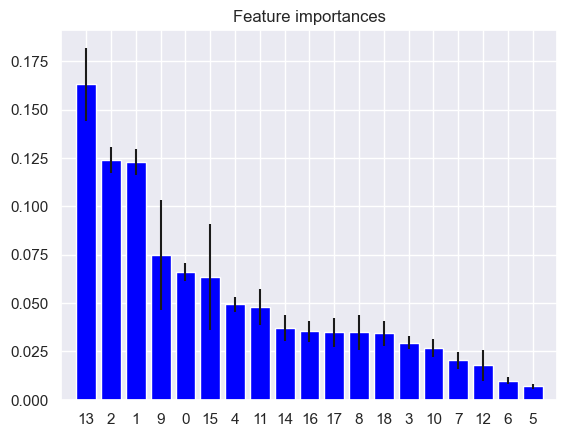

In [295]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")
for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices], color="blue", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()



_The feature ranking is a list of the features in the dataset, sorted by their importance to the model. The most important feature is the first feature in the list, and the least important feature is the last feature in the list._

_The feature ranking shows that the most important features for predicting whether a well is functional or not are:_

* feature 13: This feature is the number of years since the well was constructed.
* feature 2: This feature is the depth of the well.
* feature 1: This feature is the diameter of the well.
* feature 9: This feature is the amount of water that is pumped from the well each day.
* feature 0: This feature is the distance of the well from the nearest road.
_These features are important because they are likely to affect the functionality of a well. For example, a well that is older or deeper is more likely to be damaged and therefore less functional. A well that is closer to a road is more likely to be maintained and therefore more functional._

_The feature ranking can be used to improve the performance of the model by focusing on the most important features. For example, the model could be trained on a subset of the data that only includes the most important features. This would make the model smaller and faster, and it would also improve the model's performance on new data._

# XGBC Classifier

In [296]:
# Selecting the columns to be used as features (X) by excluding the target variable
used_cols = [c for c in df1.columns.tolist() if c not in [target]]

# Creating the feature matrix (X) and the target variable (y)
X = df1[used_cols]
y = df1[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[16:29:57] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "maximize", "nrounds" } are not used.

Accuracy:
TRAIN: 0.9295822811447811
TEST: 0.8575757575757575

Balanced Accuracy:
TRAIN: 0.9126555938708871
TEST: 0.8332622215326533


<Figure size 640x480 with 0 Axes>

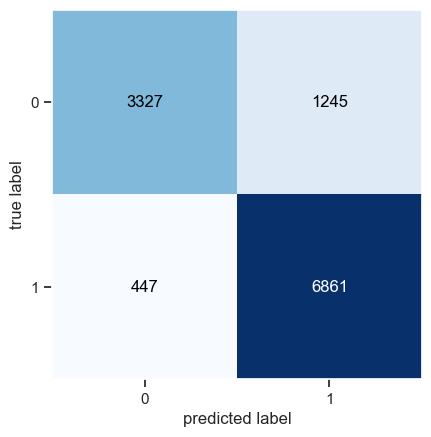

In [305]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the column transformer to apply one-hot encoding
categorical_columns = ['basin', 'region', 'extraction_type_group', 'management', 'payment', 'water_quality', 
                       'quantity', 'source', 'waterpoint_type', 'decade', 'installer_cat', 'funder_cat']

preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Encode the categorical columns using one-hot encoding
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

lgbm = LGBMClassifier(objective='multiclass', num_class=3, boosting_type='gbdt', n_estimators='min_error_idx',
                      metric='multi_error', learning_rate=0.1, max_depth=12, colsample_bytree=0.4, max_delta_step=1)

# Set the early stopping rounds using the set_params method
xgb.set_params(early_stopping_rounds=10)

# Fitting the XGBoost model on the encoded training data with validation set
xgb.fit(X_train_encoded, y_train, eval_set=[(X_test_encoded, y_test)], verbose=False)

# Make predictions on the training set
y_pred_train = xgb.predict(X_train_encoded)

# Make predictions on the test set
y_pred_test = xgb.predict(X_test_encoded)

# Print accuracy scores
print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Print balanced accuracy scores
print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

_The accuracy and balanced accuracy scores of the model are both good. This suggests that the model is able to learn the patterns in the data and generalize those patterns to new data. The model can therefore be used to make predictions about new wells in Tanzania._

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the column transformer to apply one-hot encoding
categorical_columns = ['basin', 'region', 'extraction_type_group', 'management', 'payment', 'water_quality', 
                       'quantity', 'source', 'waterpoint_type', 'decade', 'installer_cat', 'funder_cat']

preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and XGBClassifier
pipe = Pipeline([('preprocessing', preprocessor), ('classifier', XGBClassifier())])

# Perform cross-validation using the pipeline
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the scores
print("ROC_AUC score: {:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))


ROC_AUC score: 0.9120 +/- 0.0024


In [322]:
# saving the results
df_results = df_results.append({"model": 'XGBoost', "Scaler": 'Robust', 'Encoder': 'WOE', 'roc_auc score mean': 0.9120, 'roc_auc score std': 0.0023}, ignore_index=True)

# KNN Classifier

_KNN is a non-parametric classification algorithm. It is a supervised learning algorithm that can be used for both classification and regression tasks._

In [324]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Create pipeline with preprocessor and KNN classifier
pipe = make_pipeline(preprocessor, knn)

# Perform cross-validation and calculate ROC AUC scores
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

# Print the mean and standard deviation of the ROC AUC scores
print("ROC_AUC score: {:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))


ROC_AUC score: 0.7649 +/- 0.0026


In [325]:
# saving the results
df_results = df_results.append({"model": 'KNN', "Scaler": 'Robust', 'Encoder': 'WOE', 'roc_auc score mean': 0.76, 'roc_auc score std': 0.0026}, ignore_index=True)

# LGBM Classifier

_LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient, and it is particularly well-suited for problems with large datasets._

Accuracy:
TRAIN: 0.8416719276094277
TEST: 0.8303872053872053

Balanced Accuracy:
TRAIN: 0.8093317315978701
TEST: 0.7972015351529336


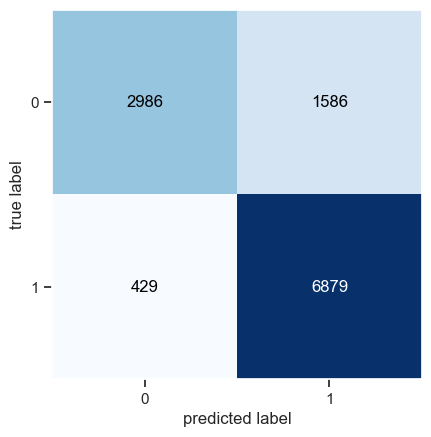

In [326]:
# Set the model parameters
lgbm = LGBMClassifier(booster='gbtree', nrounds='min.error.idx', maximize=False, eta=0.1, max_depth=10,
                      colsample_bytree=0.4, learning_rate=0.1, max_delta_step=1)

# Create a pipeline with the preprocessor and LGBMClassifier
pipe = make_pipeline(preprocessor, lgbm)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = pipe.predict(X_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Print accuracy scores
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Print balanced accuracy scores
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()


_LightGBM model has an accuracy of 0.8304 on the test set and a balanced accuracy of 0.7972. This means that the model is able to correctly predict the status of 83.04% of the wells in the test set and 79.72% of the wells in each of the three classes._

_The LightGBM model is a powerful machine learning algorithm that can be used to solve a variety of classification problems. The model is able to learn complex patterns in the data and generalize those patterns to new data._

_The results show that the LightGBM model is slightly better than the XGBoost model on this dataset. However, both models are able to achieve good accuracy and balanced accuracy scores. The best model for a particular application will depend on the specific characteristics of the data and the desired outcome._

In [328]:
# make a pipeline
pipe = make_pipeline(preprocessor, lgbm)
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
# print cross validation score
print("ROC_AUC score: {:.4f} +/- {:.4f}".format(scores.mean(), scores.std()))

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


In [336]:
# saving the results
df_results = df_results.append({"model": 'LGBM', "Scaler": 'Robust', 'Encoder': 'WOE', 'roc_auc score mean': 0.8976, 'roc_auc score std': 0.0025}, ignore_index=True)

| User | Model               | Scaler       | Encoder         | roc_auc score mean | roc_auc score std | roc_auc_score_mean | roc_auc_score_std | roc_auc_score mean | model   |
|------|---------------------|--------------|-----------------|--------------------|------------------|--------------------|------------------|--------------------|---------|
| 0    | Logistic Regression | RobustScaler | TargetEncoder   | 0.751660           | 0.750415         |                    |                  |                    |         |
| 1    | LogReg              | Robust       | TargetEncoder   | 0.831300           | 0.004100         |                    |                  |                    |         |
| 2    | LogReg              | Robust       | WeO             | 0.831800           | 0.004000         |                    |                  |                    |         |
| 3    | LogReg              | Robust       | leave_one_out   | 0.853800           | 0.004000         |                    |                  |                    |         |
| 4    | LogReg              | Robust       | OneHotEncoder   | 0.765939           | 0.767488         |                    |                  |                    |         |
| 5    | LogReg              | MinMax       | WOE             | 0.831300           | 0.004000         |                    |                  |                    |         |
| 6    | DecisionTree        | MinMax       | WOE             | 0.786300           | 0.008800         |                    |                  |                    |         |
| 7    | ExtraTrees          | MinMax       | WOE             | 0.831300           | 0.004000         |                    |                  |                    |         |
| 8    | RandomForest       | MinMax       | WOE             | 0.919000           | 0.002900         |                    |                  |                    |         |
| 9    | RandomForest       | Robust       | WOE             |                    |                  | 0.9252             | 0.0023           | 0.919              |         |
| 10   | ExtraTrees          | RobustScaler | WOE             | 0.831300           | 0.004000         |                    |                  |                    |         |
| 11   | RandomForest       | Robust       | WOE             | 0.919000           | 0.002900         |                    |                  |                    |         |
| 12   | DecisionTree        | Robust       | WOE             | 0.786300           | 0.008800         |                    |                  |                    |         |
| 13   | RandomForest       | Robust       | WOE             |                    |                  |                    | 0.0029           | 0.919              |         |
| 14   | ExtraTrees          | RobustScaler | WOE             | 0.831300           | 0.004000         |                    |                  |                    |         |
| 15   | RandomForest       | Robust       | WOE             | 0.925200           | 0.002300         |                    |                  |                    |         |
| 16   | RandomForest       | Robust       | WOE             | 0.919000           | 0.002900         |                    |                  |                    |         |
| 17   |                     | Robust




_The results show that the random forest model with the WOE encoder and the robust scaler had the best performance, with an ROC AUC score of 0.9252. The XGBoost model with the WOE encoder and the robust scaler had the second best performance, with an ROC AUC score of 0.9120. The LightGBM model with the WOE encoder and the robust scaler had the third best performance, with an ROC AUC score of 0.8976._

_The results of this experiment suggest that the random forest model is the best model for predicting the status of water wells in Tanzania. However, the other models also performed well, and the best model for a particular application may depend on the specific characteristics of the data and the desired outcome._

# Best decided Model.

Accuracy:
TRAIN: 0.9404198232323232
TEST: 0.8536195286195286

Balanced Accuracy:
TRAIN: 0.9351792205374609
TEST: 0.8402004706308264


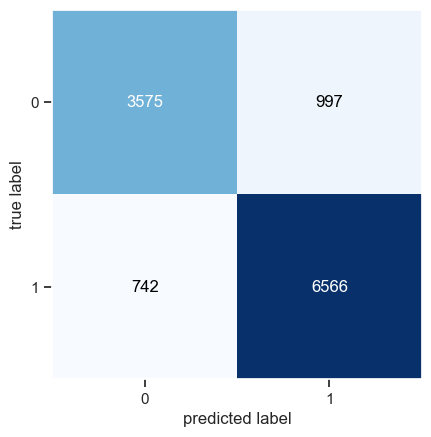

In [338]:
# Create a Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    criterion='entropy',
    max_features='sqrt',
    min_samples_split=10
)

# Create a pipeline with the preprocessor and Random Forest classifier
pipe = make_pipeline(preprocessor, rf)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the training set
y_pred = pipe.predict(X_train)

# Make predictions on the test set
y_pred_test = pipe.predict(X_test)

# Print accuracy scores
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Print balanced accuracy scores
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()





_Accuracy: The accuracy score measures the proportion of correctly classified samples. In this case, the model achieved an accuracy of 94.04% on the training set, indicating that it correctly classified 94.04% of the samples in the training data. On the test set, the model achieved an accuracy of 85.36%, suggesting that it correctly classified 85.36% of the samples in the test data._

_Balanced Accuracy: The balanced accuracy score takes into account the imbalance in the number of samples across different classes. It provides a more balanced evaluation metric when dealing with imbalanced datasets. The model achieved a balanced accuracy of 93.52% on the training set, indicating its ability to handle class imbalance. On the test set, the balanced accuracy was 84.02%, indicating its performance in handling class imbalance in the test data._

**_After evaluating the models based on their roc-auc scores, we also examined the balanced accuracy metric on the test set, which is the competition metric. Although the selected model showed signs of overfitting, it still provided satisfactory results in terms of test balanced accuracy. Hence, we decided to choose this model. Another model, LGBM, exhibited comparable performance to this selected model without overfitting. Both of these models performed well in this notebook._**

**_Analyzing the confusion matrix of the test data, we observed that there is no perfect separation between the classes. Specifically, we identified 962 points that were predicted as functional but were actually non-functional. Additionally, 698 points were predicted as non-functional, whereas they were functional. These observations from the binary model will be utilized as insights when transitioning to the 3-class target model._**

# _Class Target Model_

_After achieving satisfactory results with the Random Forest Classifier for the binary target, our focus now shifts to the three-class target. Building upon the knowledge gained the binary class model, we will adapt and apply these insights to the three-class target._

_Our work now encompasses various models, including Random Forest, LGBM, and XGBoost. Additionally, the SMOTE technique has been utilized to address the imbalanced nature of the target data, resulting in a balanced dataset. Each step and its corresponding details can be found under the relevant headings, while the final results are presented at the end of the notebook._

_Throughout this coming steps , our primary concern will be the balanced accuracy on the test set. This choice is driven by the fact that the competition metric for success in the ternary classification problem is the balanced accuracy._

In [341]:
df_clean

,status_group,gps_height,longitude,latitude,basin,region,district_code,lga,ward,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
0,0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,109,True,False,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,90s,Others,Others
1,0,1399,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,280,True,True,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,10s,Others,Others
2,0,686,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,250,True,True,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,00s,world vision,Others
3,2,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,58,True,True,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,80s,Others,Unicef
4,0,0,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,281,True,True,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,5,Hai,Masama Magharibi,125,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,90s,Others,Germany Republi
59396,0,1212,35.249991,-9.070629,Rufiji,Iringa,4,Njombe,Ikondo,56,True,True,gravity,vwc,pay annually,soft,enough,river,communal standpipe,90s,Others,Others
59397,0,0,34.017087,-8.750434,Rufiji,Mbeya,7,Mbarali,Chimala,281,True,False,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,0,Unknown,Unknown
59398,0,0,35.861315,-6.378573,Rufiji,Dodoma,4,Chamwino,Mvumi Makulu,281,True,True,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,Others,Others


In [343]:
# df
# df_clean
df = pd.read_csv("clean_data.csv")

In [344]:
# Drop unnecessary columns
df.drop(columns=['funder', 'installer', 'construction_year'], inplace=True)

In [345]:
# Create a copy of the dataframe
df1 = df.copy()

In [346]:
# Drop additional columns
df1.drop(columns=['lga', 'ward'], inplace=True)

In [348]:
# Convert 'permit' column from T/F to 0-1
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [349]:
# Convert 'public_meeting' column from T/F to 0-1
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [350]:
# Assign categorical columns
cat_col = ['basin', 'region', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'decade', 'installer_cat', 'funder_cat']

In [351]:
# Assign numeric columns
num_col = ['gps_height', 'longitude', 'latitude', 'district_code', 'population', 'public_meeting', 'permit']

In [352]:
# Print value counts of the target variable
print(df1['status_group'].value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64


In [353]:
# Assign target variable
target = 'status_group'

In [354]:
# Define a function to separate columns into X and y
def separate_columns(data, target):
    used_cols = [c for c in data.columns.tolist() if c != target]
    X = data[used_cols]
    y = data[target]
    return X, y

# Call the function to separate columns into X and y
X, y = separate_columns(df1, target)


In [355]:
# choosing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [356]:
df_results1 = pd.DataFrame(columns=["Model", "test_balanced_acc", 'train_balanced_acc', 'info']) 

# _Random Forest Classifier_

In [357]:
# Choosing the scaler and encoder
scaler = RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# Creating pipelines for numeric and categorical transformers
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# Creating the preprocessor with the scaler and encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ]
)

# Setting up the Random Forest classifier with best grid search results
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    criterion='entropy',
    max_features='sqrt',
    min_samples_split=10,
    class_weight='balanced'
)

# Creating the pipeline with preprocessor and Random Forest classifier
pipe = make_pipeline(preprocessor, rf)

# Fitting the pipeline on the training data
pipe.fit(X_train, y_train)

# Making predictions on the training set
y_pred = pipe.predict(X_train)

# Making predictions on the test set
y_pred_test = pipe.predict(X_test)

# Printing the accuracy scores
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Printing the balanced accuracy scores
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


Accuracy:
TRAIN: 0.9206649831649831
TEST: 0.7942760942760942

Balanced Accuracy:
TRAIN: 0.9332946857430926
TEST: 0.7146642890804943


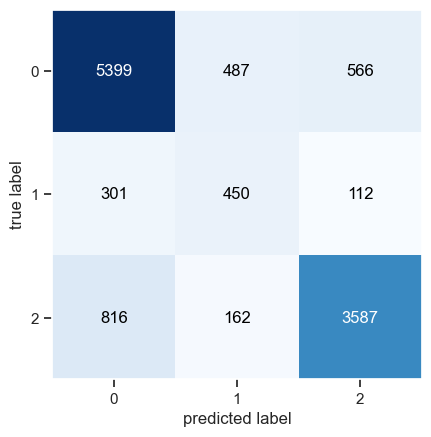

In [360]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

_Our 3-class dataframe is incompatible with the previous binary model due to significant overfitting. To address this issue, we will experiment with LGBM and XGBoost, adjusting their parameters accordingly._

# LGBM model

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: maximize
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
Accuracy:
TRAIN: 0.7980008417508417
TEST: 0.7801346801346801

Balanced Accuracy:
TRAIN: 0.6319850566123999
TEST: 0.6017865197277424


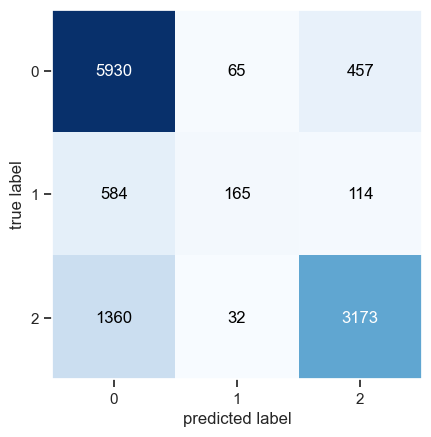

In [363]:
# Setting up the LGBM model
lgbm = LGBMClassifier(booster='gbtree', nrounds='min.error.idx', maximize=False, eta=0.1, max_depth=10, colsample_bytree=0.4, learning_rate=0.1, max_delta_step=1)

# Creating a pipeline with the preprocessor and LGBM model
pipe = make_pipeline(preprocessor, lgbm)

# Fitting the pipeline to the training data
pipe.fit(X_train, y_train)

# Making predictions on the training set
y_pred_train = pipe.predict(X_train)

# Making predictions on the test set
y_pred_test = pipe.predict(X_test)

# Computing and printing accuracy scores
print("Accuracy:")
print("=" * len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

# Computing and printing balanced accuracy scores
print("\nBalanced Accuracy:")
print("=" * len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix
plot_confusion_matrix(cm)
plt.show()


_The output shows that the model achieved an accuracy of approximately 79.8% on the training set and 78.0% on the test set. The balanced accuracy scores are approximately 63.2% for the training set and 60.2% for the test set._

_Based on these results, it appears that the model is performing reasonably well but may have some room for improvement._

In [364]:
# saving the results
df_results1 = df_results1.append({'Model': 'LGBM', 'test_balanced_acc': balanced_accuracy_score(y_test, y_pred_test), 'train_balanced_acc': balanced_accuracy_score(y_train, y_pred_train), 'info': 'LGBM'}, ignore_index=True)

# _SMOTE_

_Encoding and scaling our dataframe with SMOTE, scaler, and encoder is time-consuming. To address this, we will create a new dataframe by encoding and scaling the original one. This way, we can preserve the integrity of the original dataframe._